In [1]:
import imblearn
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import ks_2samp, anderson_ksamp, mannwhitneyu

In [2]:
print(imblearn.__version__)

0.11.0


In [3]:
df = pd.read_csv("contributors2.csv")

In [4]:
df.columns

Index(['name_with_owner', 'login', 'url', 'type', 'admin', 'contributions',
       'commits', 'core_qty', 'core_time', 'is_core', 'issues', 'prs',
       'pr_comments_self', 'pr_comments_others', 'issues_comments_self',
       'issues_comments_others', 'pr_reactions_self', 'pr_reactions_others',
       'issues_reactions_self', 'issues_reactions_others',
       'issue_hours_to_respond_reaction', 'pr_hours_to_respond_reaction',
       'issue_hours_to_respond_comment', 'pr_hours_to_respond_comment',
       'days_to_close_issue', 'days_to_close_pr', 'login-2', 'bio', 'repos',
       'gists', 'followers', 'following', 'created', 'months_experience',
       'has_bio'],
      dtype='object')

In [121]:
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']

# Subset the DataFrame based on the selected columns
subset_df = df[selected_columns].copy()
subset_df = subset_df[~subset_df.duplicated(keep='first')]
print(subset_df['is_core'].value_counts())

0    7925
1     358
Name: is_core, dtype: int64


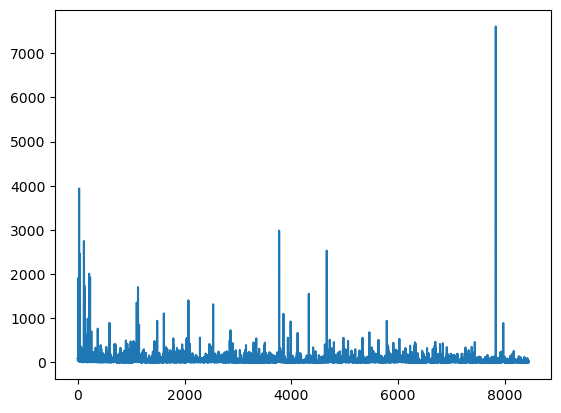

In [191]:
plt.plot(subset_df.repos)

In [122]:
subset_df
repo_outlier = subset_df.loc[subset_df['repos'].idxmax()]
repo_outlier

is_core                  0.00
repos                38287.00
gists                    0.00
followers              503.00
following                0.00
months_experience      111.12
has_bio                  0.00
Name: 41, dtype: float64

In [123]:
subset_df.drop(41, inplace=True)
subset_df.loc[subset_df['repos'].idxmax()]

is_core                 0.00
repos                7606.00
gists                   0.00
followers               6.00
following               0.00
months_experience      13.03
has_bio                 1.00
Name: 7827, dtype: float64

In [124]:
subset_df.dtypes

is_core                int64
repos                  int64
gists                  int64
followers              int64
following              int64
months_experience    float64
has_bio                int64
dtype: object

In [126]:
print(subset_df['is_core'].value_counts())

0    7924
1     358
Name: is_core, dtype: int64


In [127]:
x = subset_df.drop(columns='is_core')

In [128]:
y = subset_df['is_core']

In [129]:
x.dtypes
x

repos  gists  followers  following  months_experience  has_bio
0        90      5        450         67             115.45        1
1        88     14       2685          7             151.54        1
2       102     72         42          0             166.86        0
3        37     15         11         10             152.46        1
4        50      1         58         17             137.50        1
...     ...    ...        ...        ...                ...      ...
8439     19      0          5          1             126.98        0
8440      0      0          0          0              28.65        0
8441      1      1         13          3             124.58        1
8442      0      0          0          0               9.54        0
8443     26      0          6         16             113.27        1

[8282 rows x 6 columns]

In [130]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8439    0
8440    0
8441    0
8442    0
8443    0
Name: is_core, Length: 8282, dtype: int64

In [131]:
x = x.to_numpy()
y = y.to_numpy()

In [132]:
adasyn = imblearn.over_sampling.ADASYN(random_state = 0)
# Fit and transform the data
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
df_resampled_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
df_resampled_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
df_resampled_adasyn['has_bio'] = df_resampled_adasyn['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
df_resampled_adasyn

repos      gists    followers  following  months_experience  \
0       90.000000   5.000000   450.000000  67.000000         115.450000   
1       88.000000  14.000000  2685.000000   7.000000         151.540000   
2      102.000000  72.000000    42.000000   0.000000         166.860000   
3       37.000000  15.000000    11.000000  10.000000         152.460000   
4       50.000000   1.000000    58.000000  17.000000         137.500000   
...           ...        ...          ...        ...                ...   
15872   49.246221   4.449244    13.530453   0.510151         134.139270   
15873   66.231844  10.627295    25.904631   3.627295         135.180762   
15874   67.581943  11.784522    30.340668   4.784522         134.619507   
15875   61.817870   6.966886    11.958607   0.016557         136.978082   
15876   54.252000  11.980857    18.641143   1.660286         137.316331   

       has_bio  is_core  
0            1        0  
1            1        0  
2            0        0  
3            1        0  
4            1        0  
...        ...      ...  
15872        0        1  
15873        1        1  
15874        1        1  
15875        0        1  
15876        0        1  

[15877 rows x 7 columns]

In [133]:
df_resampled_adasyn.dtypes

repos                float64
gists                float64
followers            float64
following            float64
months_experience    float64
has_bio                int64
is_core                int64
dtype: object

In [134]:
smnc = imblearn.over_sampling.SMOTENC(random_state=0, categorical_features=[5])
x_resampled_smnc, y_resampled_smnc = smnc.fit_resample(x, y)
df_resampled_smnc = pd.DataFrame(data=x_resampled_smnc, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
df_resampled_smnc['is_core'] = y_resampled_smnc
df_resampled_smnc

repos      gists    followers  following  months_experience  \
0       90.000000   5.000000   450.000000  67.000000         115.450000   
1       88.000000  14.000000  2685.000000   7.000000         151.540000   
2      102.000000  72.000000    42.000000   0.000000         166.860000   
3       37.000000  15.000000    11.000000  10.000000         152.460000   
4       50.000000   1.000000    58.000000  17.000000         137.500000   
...           ...        ...          ...        ...                ...   
15843   16.073600   0.000000    11.244160   3.755840          83.017390   
15844   13.851768   0.000000    48.904708   3.957648         101.432507   
15845   20.390616   0.199218    31.406256  24.218768         153.382332   
15846   63.847452  15.152548   185.786942  62.682803         149.772726   
15847   22.360186   0.000000    60.123167   0.000000          96.290619   

       has_bio  is_core  
0          1.0        0  
1          1.0        0  
2          0.0        0  
3          1.0        0  
4          1.0        0  
...        ...      ...  
15843      1.0        1  
15844      0.0        1  
15845      0.0        1  
15846      0.0        1  
15847      1.0        1  

[15848 rows x 7 columns]

In [135]:
border = imblearn.over_sampling.BorderlineSMOTE(random_state=0)
x_resampled_border, y_resampled_border = border.fit_resample(x, y)
df_resampled_border = pd.DataFrame(data=x_resampled_border, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
df_resampled_border['is_core'] = y_resampled_border
df_resampled_border['has_bio'] = df_resampled_border['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
df_resampled_border

repos      gists     followers   following  months_experience  \
0       90.000000   5.000000    450.000000   67.000000         115.450000   
1       88.000000  14.000000   2685.000000    7.000000         151.540000   
2      102.000000  72.000000     42.000000    0.000000         166.860000   
3       37.000000  15.000000     11.000000   10.000000         152.460000   
4       50.000000   1.000000     58.000000   17.000000         137.500000   
...           ...        ...           ...         ...                ...   
15843  194.272129  55.442675  17095.280891  146.367452         114.439838   
15844   24.309908   0.896697      9.103303    7.690092          79.357196   
15845  153.441694  56.805112    133.207667   19.182110         136.491652   
15846   56.689458   0.310542     72.962953   31.447290         115.813332   
15847  117.069120  34.120401     82.154961    5.327760         162.013668   

       has_bio  is_core  
0            1        0  
1            1        0  
2            0        0  
3            1        0  
4            1        0  
...        ...      ...  
15843        1        1  
15844        1        1  
15845        1        1  
15846        1        1  
15847        1        1  

[15848 rows x 7 columns]

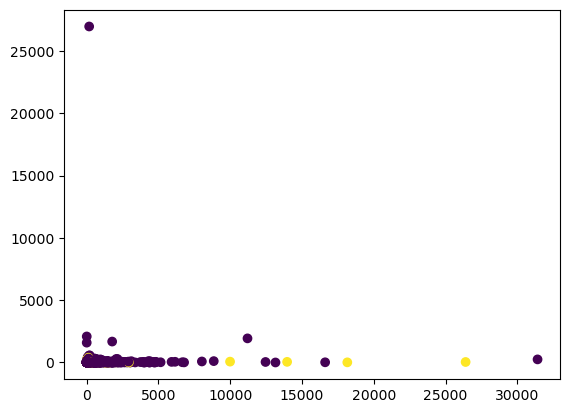

In [136]:
plt.scatter(subset_df.followers, subset_df.gists, c=subset_df.is_core)

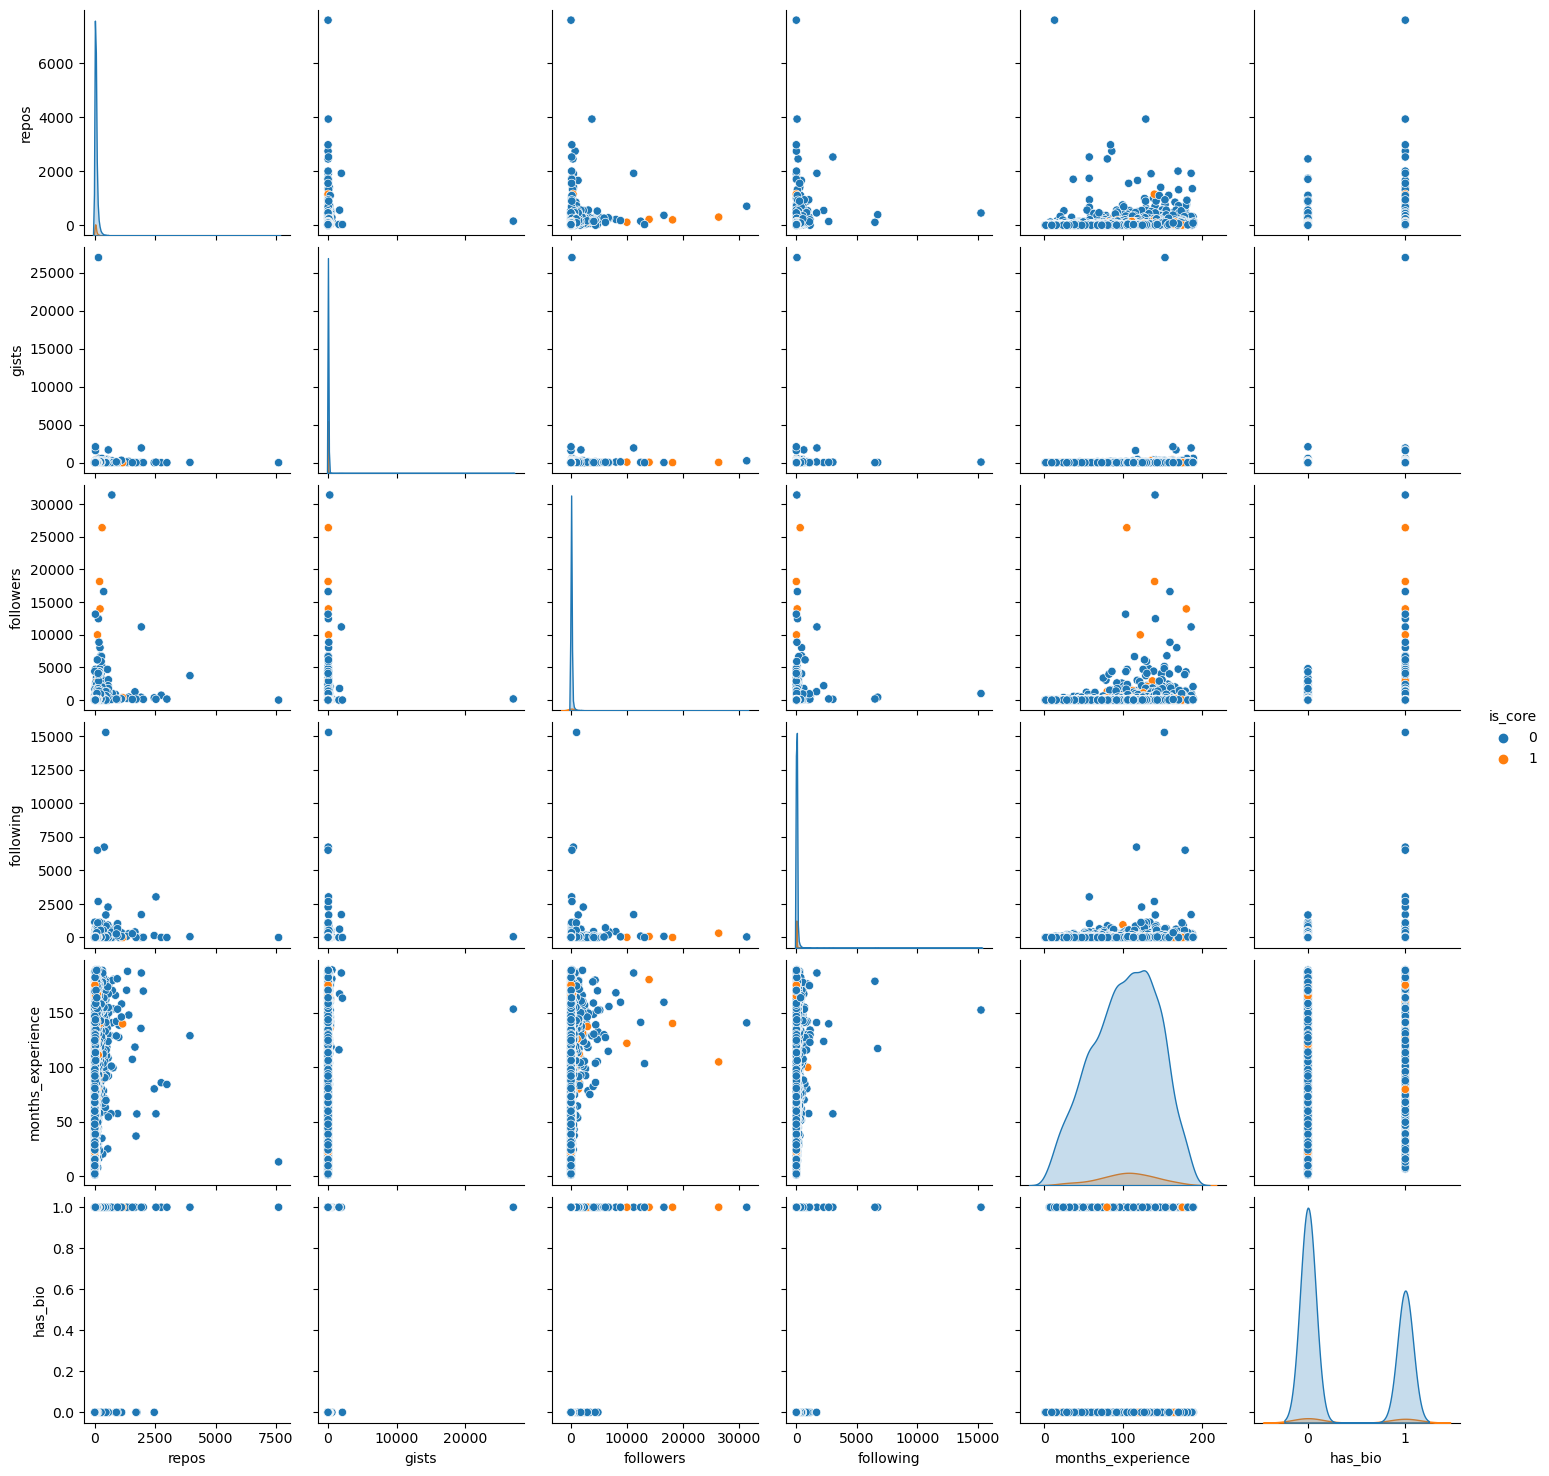

In [137]:
sns.pairplot(subset_df, hue = 'is_core')

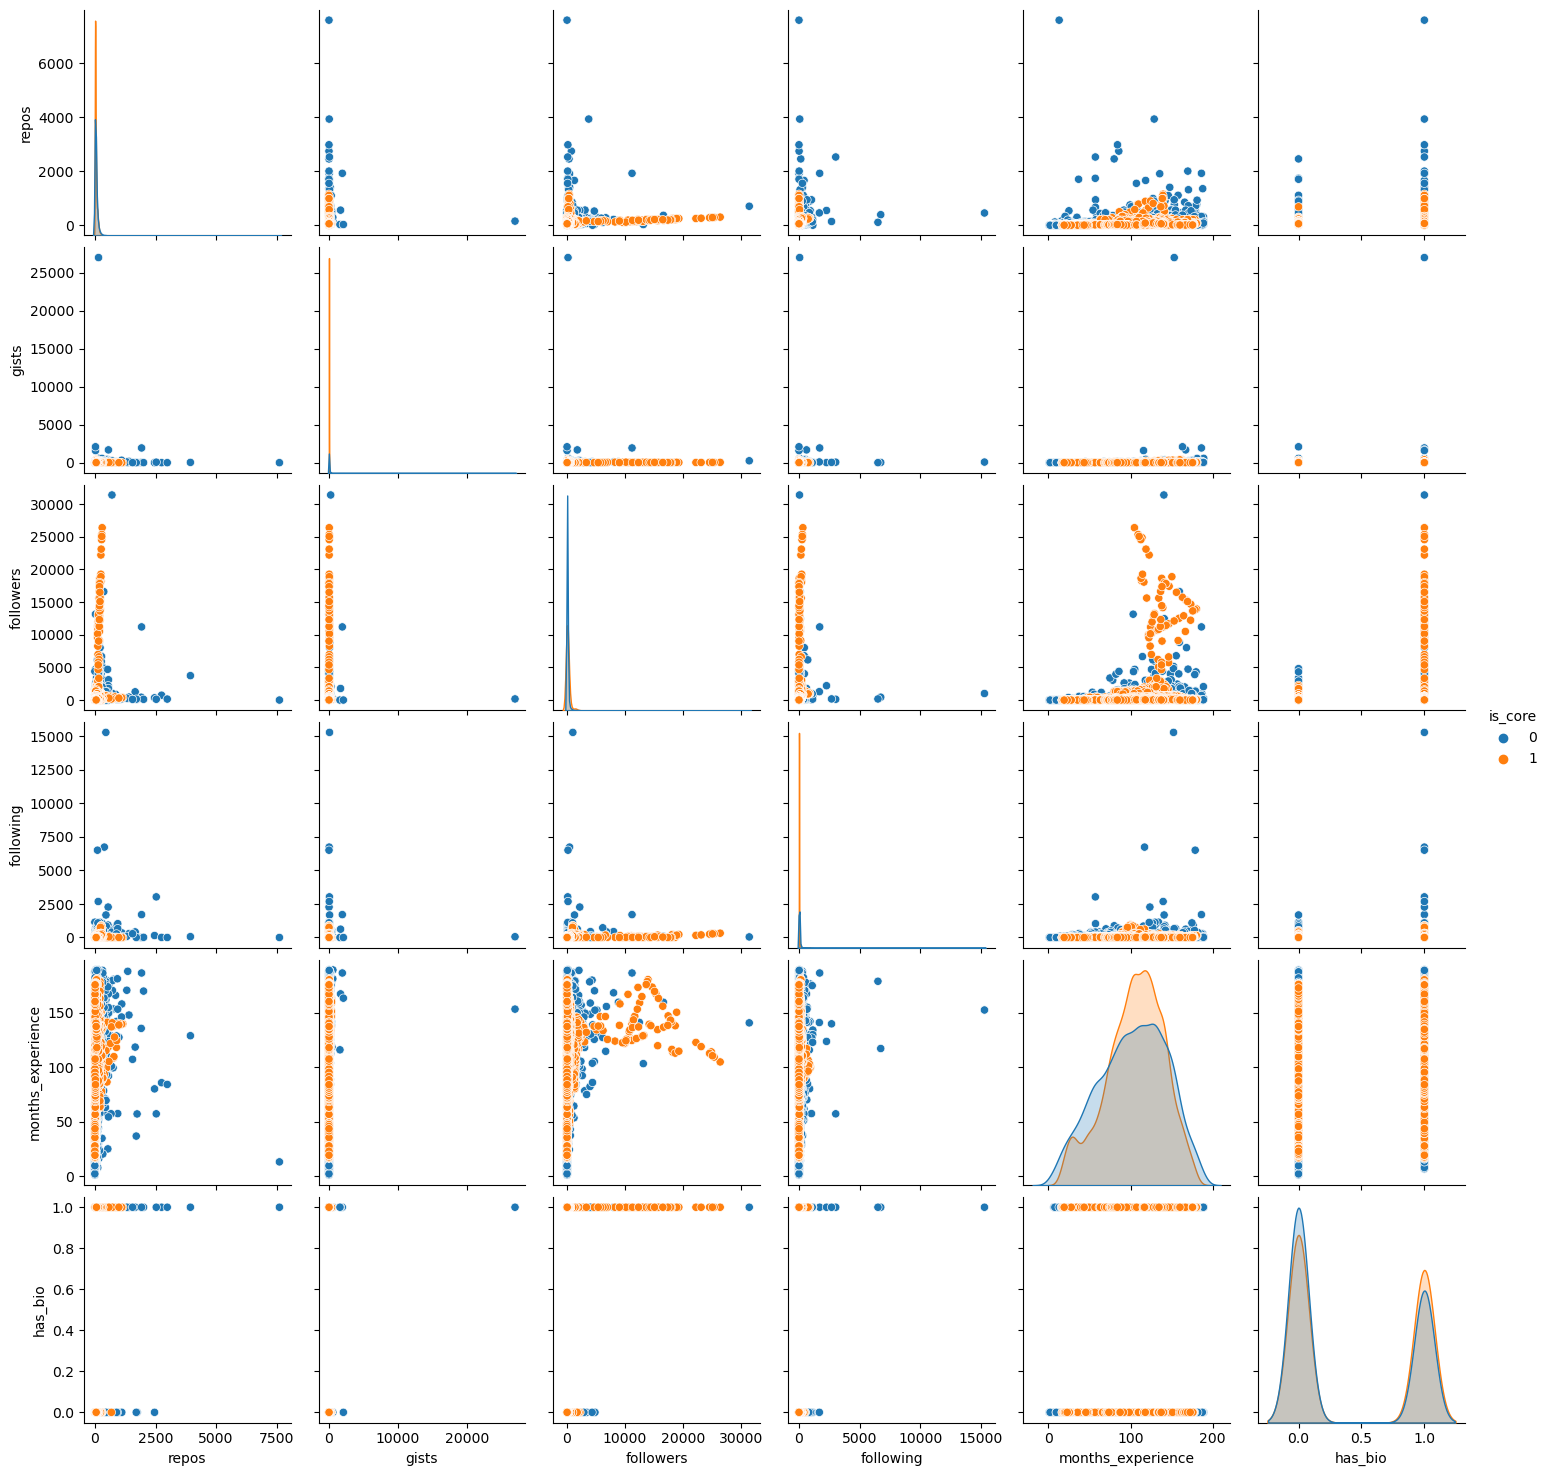

In [138]:
sns.pairplot(df_resampled_adasyn, hue = 'is_core')

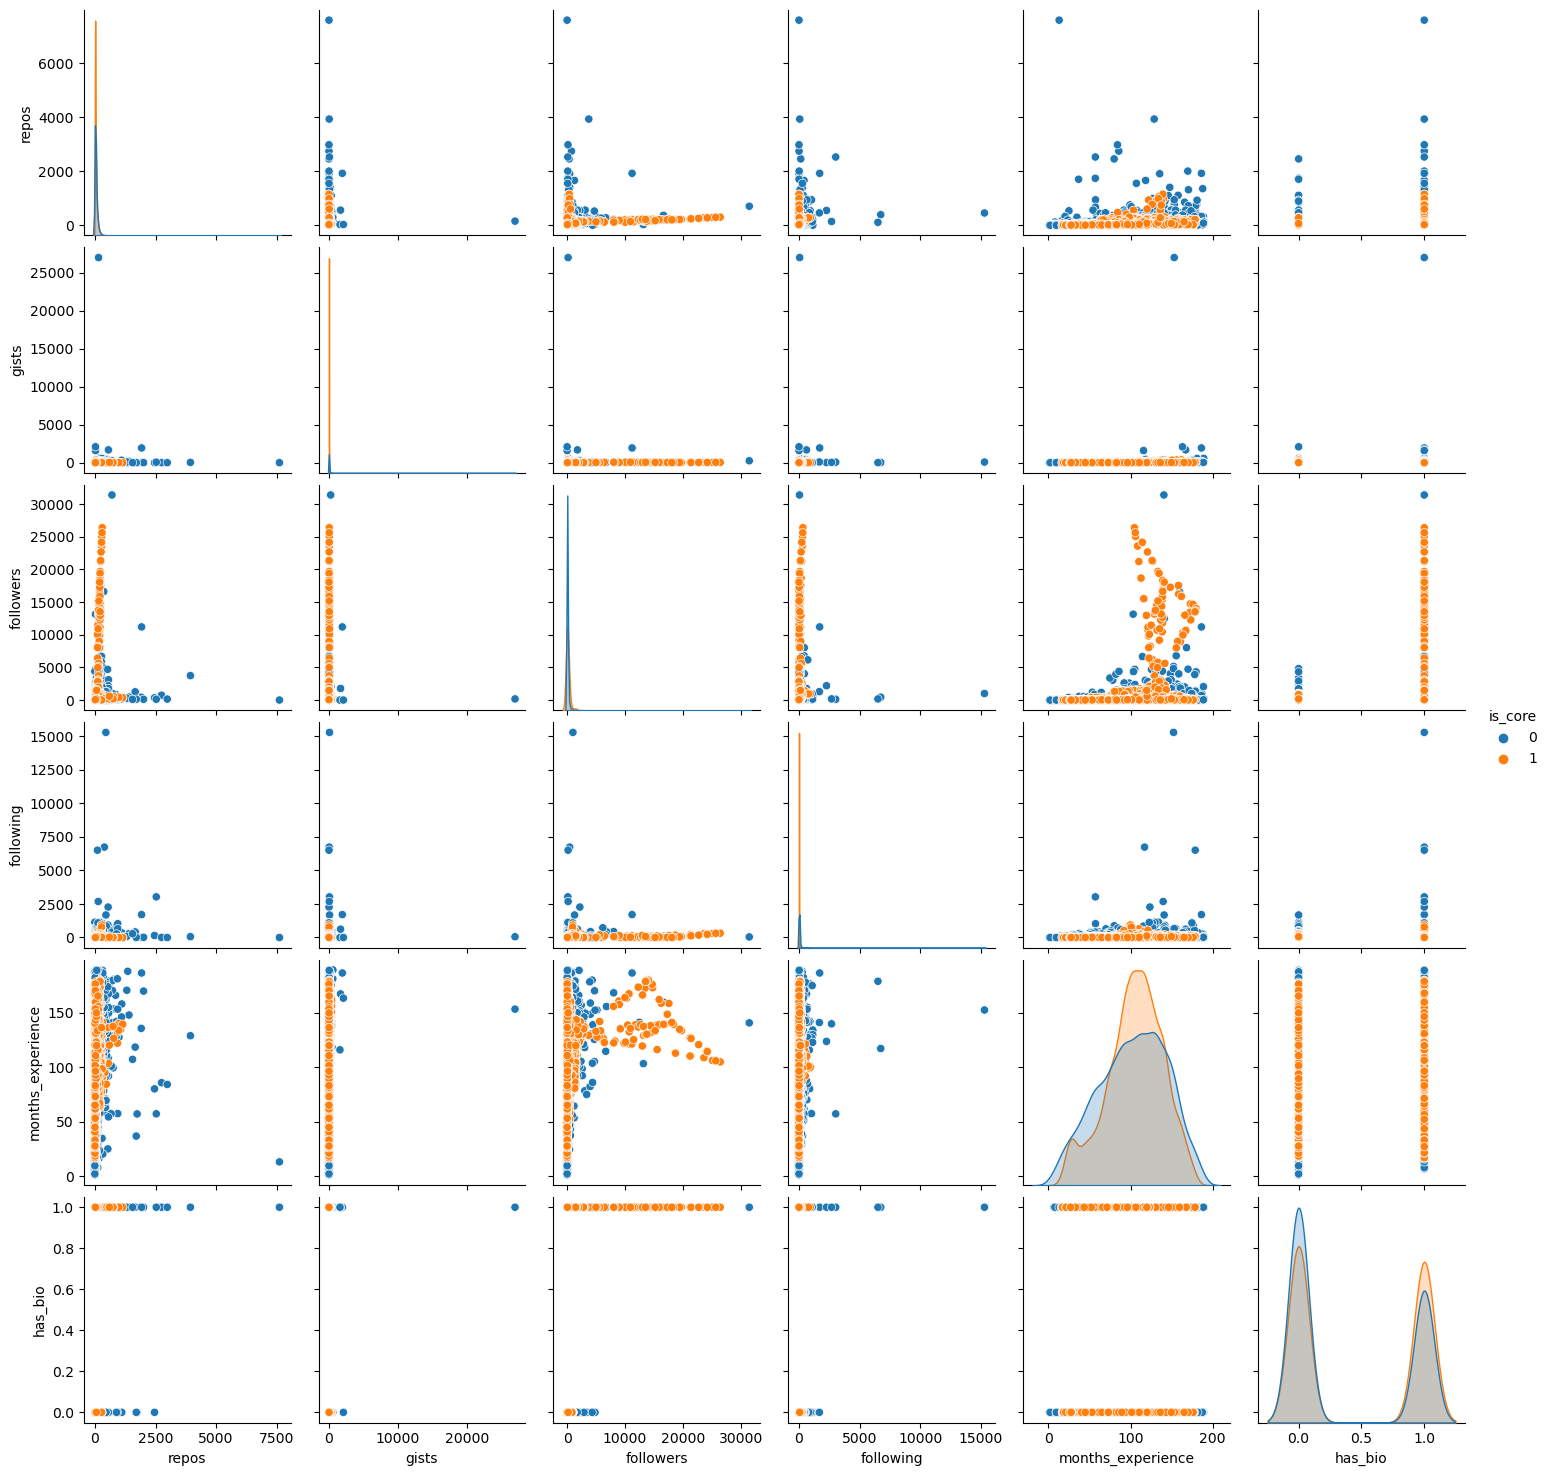

In [139]:
sns.pairplot(df_resampled_smnc, hue = 'is_core')

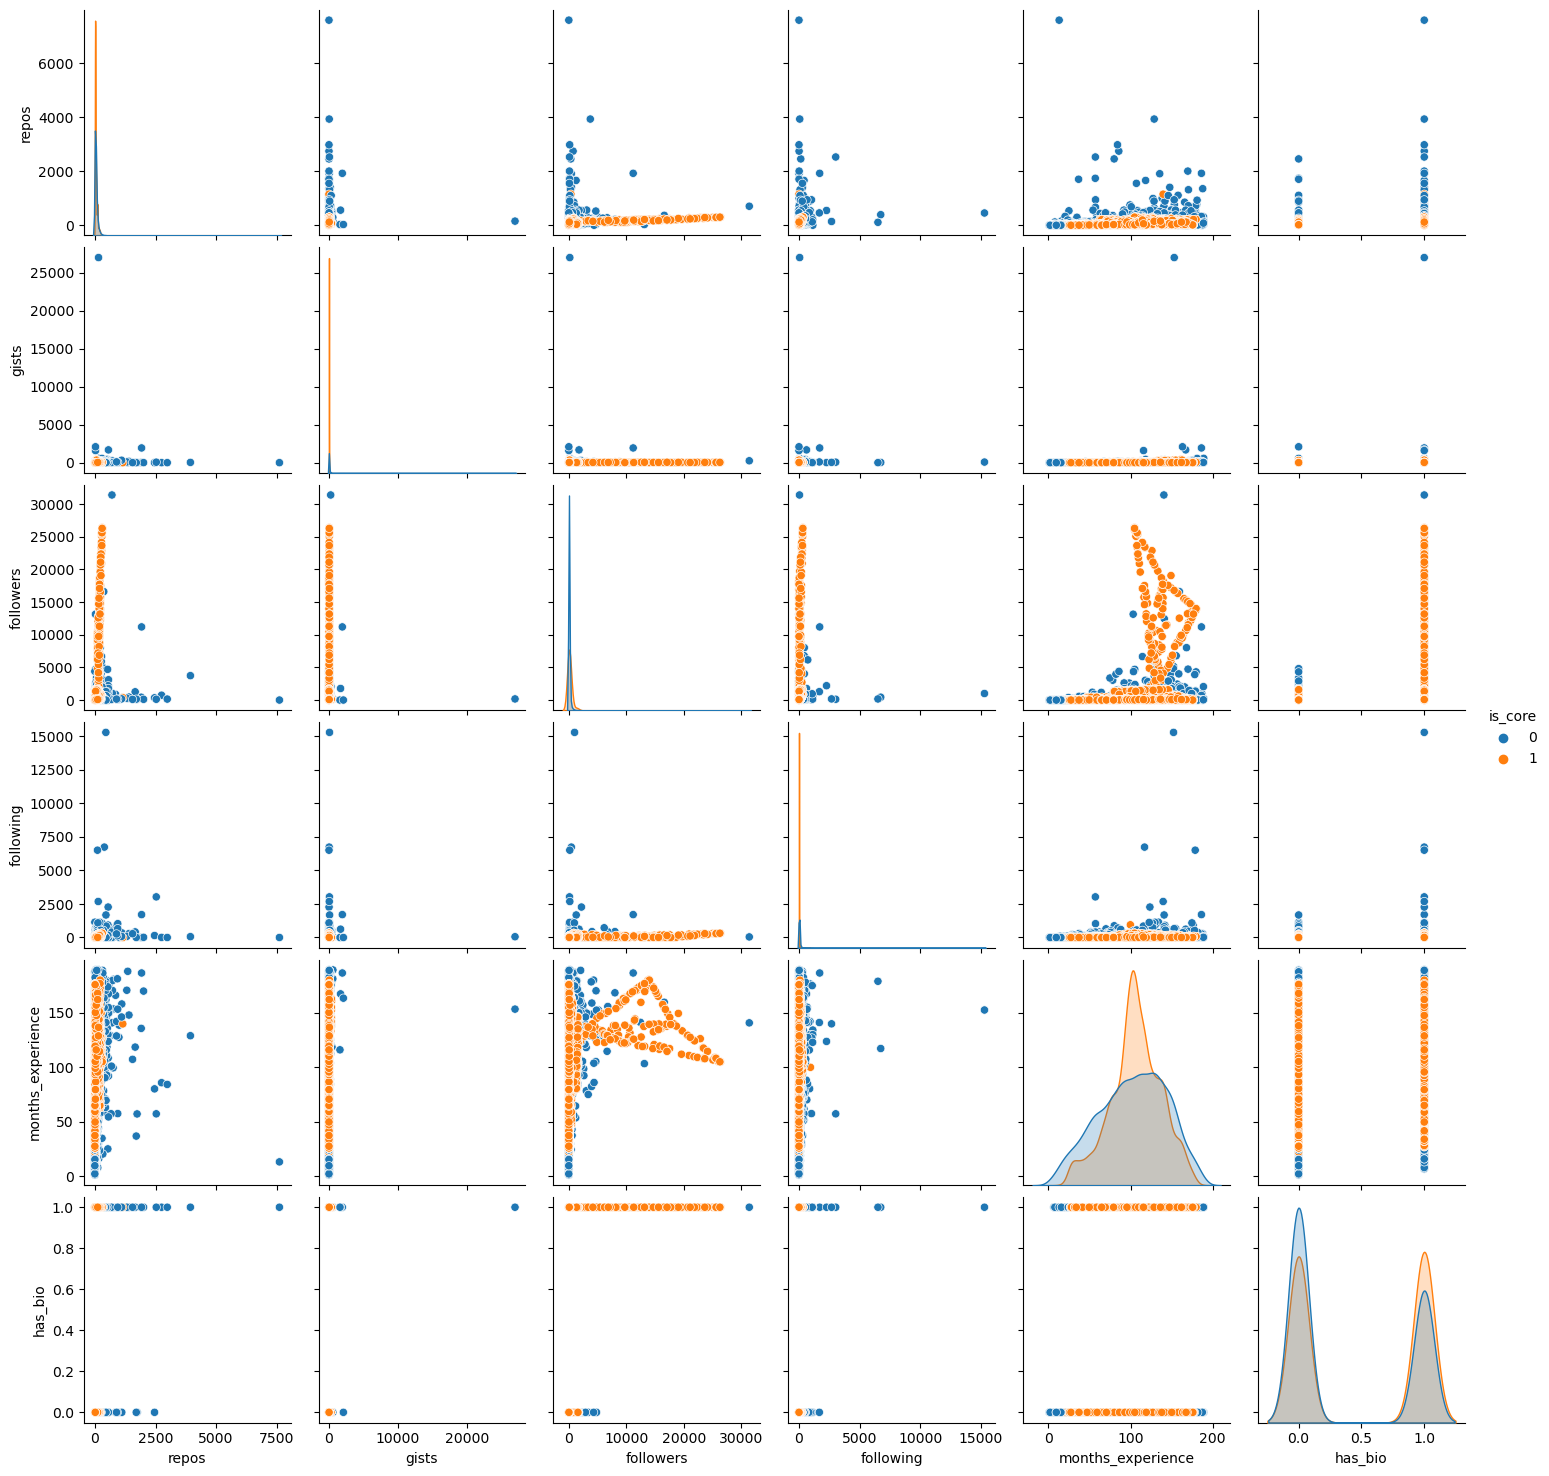

In [140]:
sns.pairplot(df_resampled_border, hue = 'is_core')

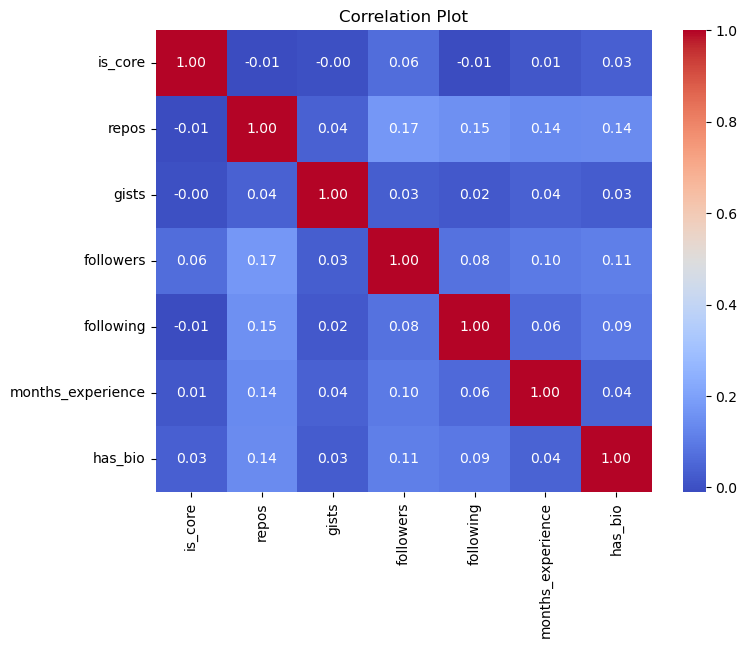

In [142]:
# Calculating the correlation matrix
correlation_matrix = subset_df.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

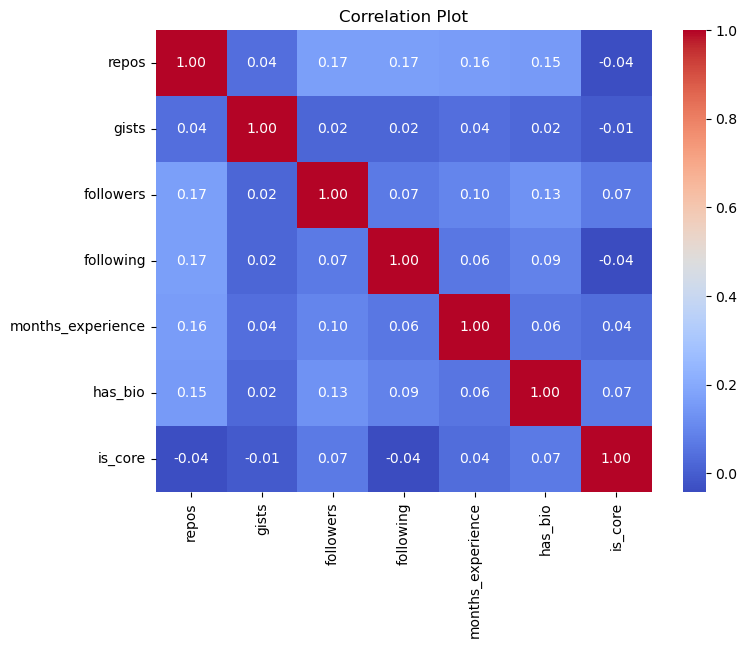

In [143]:
# Calculating the correlation matrix
correlation_matrix = df_resampled_adasyn.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

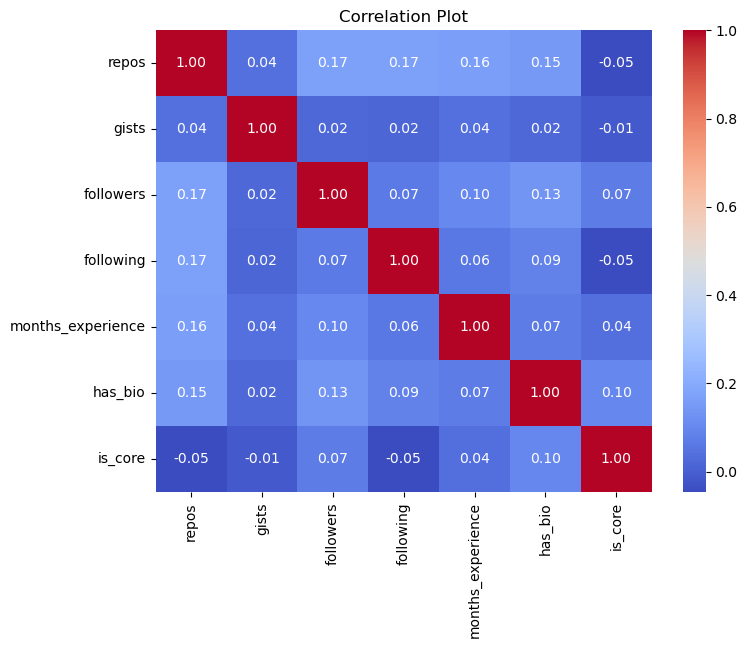

In [144]:
# Calculating the correlation matrix
correlation_matrix = df_resampled_smnc.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

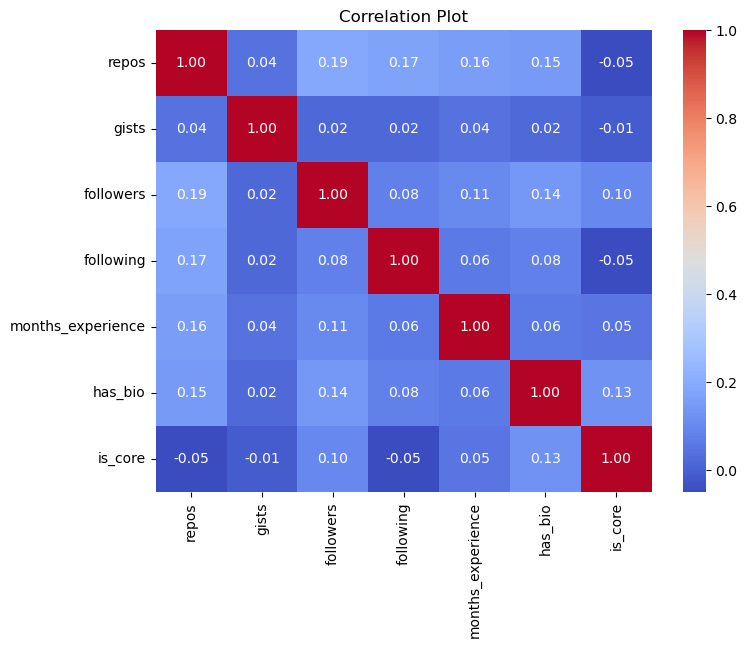

In [145]:
# Calculating the correlation matrix
correlation_matrix = df_resampled_border.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

In [146]:
X = subset_df.drop('is_core', axis=1)
y = subset_df['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.0001
gists: 0.0012
followers: 0.0048
following: 0.0014
months_experience: 0.0001
has_bio: 0.0011


In [147]:
X = df_resampled_adasyn.drop('is_core', axis=1)
y = df_resampled_adasyn['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4752
gists: 0.3078
followers: 0.4498
following: 0.3953
months_experience: 0.0397
has_bio: 0.0007


In [148]:
X = df_resampled_smnc.drop('is_core', axis=1)
y = df_resampled_smnc['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4843
gists: 0.3107
followers: 0.4563
following: 0.3919
months_experience: 0.0474
has_bio: 0.0027


In [149]:
X = df_resampled_border.drop('is_core', axis=1)
y = df_resampled_border['is_core']

# Calculating mutual information for each feature
mi_scores = mutual_info_classif(X, y)  # For classification tasks


# Displaying the mutual information scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")

repos: 0.4795
gists: 0.3042
followers: 0.4714
following: 0.3961
months_experience: 0.0637
has_bio: 0.0104


In [150]:


ks_stat1, ks_pvalue1 = ks_2samp(subset_df.has_bio, df_resampled_adasyn.has_bio)
ks_stat2, ks_pvalue2 = ks_2samp(subset_df.followers, df_resampled_smnc.followers)
ks_stat3, ks_pvalue3 = ks_2samp(subset_df.followers, df_resampled_border.followers)

#ad_stat1, ad_crit1, ad_sig1 = anderson_ksamp([subset_df, df_resampled_adasyn])
#ad_stat2, ad_crit2, ad_sig2 = anderson_ksamp([subset_df, df_resampled_smnc])

# Displaying results
print(f"KS Test for Generated Data 1:\nKS Statistic: {ks_stat1}\nP-value: {ks_pvalue1}\n")
print(f"KS Test for Generated Data 2:\nKS Statistic: {ks_stat2}\nP-value: {ks_pvalue2}\n")
print(f"KS Test for Generated Data 3:\nKS Statistic: {ks_stat3}\nP-value: {ks_pvalue3}\n")
#print(f"Anderson-Darling Test for Generated Data 1:\nAD Statistic: {ad_stat1}\nCritical Values: {ad_crit1}\nSignificance Level: {ad_sig1}\n")
#print(f"Anderson-Darling Test for Generated Data 2:\nAD Statistic: {ad_stat2}\nCritical Values: {ad_crit2}\nSignificance Level: {ad_sig2}\n")

# Visualization
#sns.histplot(original_data, color='blue', label='Original Data', kde=True)
#sns.histplot(generated_data1, color='orange', label='Generated Data 1', kde=True)
#sns.histplot(generated_data2, color='green', label='Generated Data 2', kde=True)
#plt.legend()
#plt.title('Comparison of Distributions')
#plt.show()

KS Test for Generated Data 1:
KS Statistic: 0.030418215788522884
P-value: 8.261959533201128e-05

KS Test for Generated Data 2:
KS Statistic: 0.102823447966988
P-value: 1.6115434868601465e-50

KS Test for Generated Data 3:
KS Statistic: 0.14435877554956095
P-value: 2.2441385329346762e-99



In [151]:
ks_adasyn = []
p_adasyn = []
ks_smnc = []
p_smnc =[]
ks_border = []
p_border = []
for i in range(5):
    x = subset_df.iloc[:, i+1]
    y1 = df_resampled_adasyn.iloc[:,i]
    y2 = df_resampled_smnc.iloc[:,i]
    y3 = df_resampled_border.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = ks_2samp(x, y1)
    ks_stat2, ks_pvalue2 = ks_2samp(x, y2)
    ks_stat3, ks_pvalue3 = ks_2samp(x, y3)
    
    ks_adasyn.append(ks_stat1)
    ks_smnc.append(ks_stat2)
    ks_border.append(ks_stat3)
    
    p_adasyn.append(ks_pvalue1)
    p_smnc.append(ks_pvalue2)
    p_border.append(ks_pvalue3)

In [152]:
for i in range(len(p_adasyn)):
    print(p_border[i] < 0.05)

True
True
True
True
True


In [153]:
for i in range(len(ks_adasyn)):
    cur = [ks_adasyn[i], ks_smnc[i], ks_border[i]]
    print(cur.index(min(cur)))

0
2
0
1
0


In [154]:
df_resampled_adasyn

repos      gists    followers  following  months_experience  \
0       90.000000   5.000000   450.000000  67.000000         115.450000   
1       88.000000  14.000000  2685.000000   7.000000         151.540000   
2      102.000000  72.000000    42.000000   0.000000         166.860000   
3       37.000000  15.000000    11.000000  10.000000         152.460000   
4       50.000000   1.000000    58.000000  17.000000         137.500000   
...           ...        ...          ...        ...                ...   
15872   49.246221   4.449244    13.530453   0.510151         134.139270   
15873   66.231844  10.627295    25.904631   3.627295         135.180762   
15874   67.581943  11.784522    30.340668   4.784522         134.619507   
15875   61.817870   6.966886    11.958607   0.016557         136.978082   
15876   54.252000  11.980857    18.641143   1.660286         137.316331   

       has_bio  is_core  
0            1        0  
1            1        0  
2            0        0  
3            1        0  
4            1        0  
...        ...      ...  
15872        0        1  
15873        1        1  
15874        1        1  
15875        0        1  
15876        0        1  

[15877 rows x 7 columns]

In [155]:
subset_df

is_core  repos  gists  followers  following  months_experience  has_bio
0           0     90      5        450         67             115.45        1
1           0     88     14       2685          7             151.54        1
2           0    102     72         42          0             166.86        0
3           0     37     15         11         10             152.46        1
4           0     50      1         58         17             137.50        1
...       ...    ...    ...        ...        ...                ...      ...
8439        0     19      0          5          1             126.98        0
8440        0      0      0          0          0              28.65        0
8441        0      1      1         13          3             124.58        1
8442        0      0      0          0          0               9.54        0
8443        0     26      0          6         16             113.27        1

[8282 rows x 7 columns]

In [156]:
df1 = pd.read_csv("contributors.csv")

In [157]:
c2_cols = ['microsoft/azuredatastudio', 'xamarin/xamarin-macios', 'pingcap/docs']

# Filtering rows where 'Name' is in the include_list
filtered_c2 = df1[df1['name_with_owner'].isin(c2_cols)]
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']
# Subset the DataFrame based on the selected columns
c2 = filtered_c2[selected_columns]

In [158]:
c2

is_core  repos  gists  followers  following  months_experience  has_bio
18          0     68      2        167         87              97.59        1
49          0  38287      0        503          0             111.12        0
123         0   2749      0        747          8              85.70        1
149         0     12      1          5          2              45.65        0
207         0     16      0         79         27              97.63        1
...       ...    ...    ...        ...        ...                ...      ...
7360        0     26      0         37         49             105.15        0
7361        0      6      0          0          0             109.57        0
7362        0     95     10         28         22              90.98        1
7363        0     27      0         30         93              85.10        0
7364        0      6      0          2          1              53.70        0

[596 rows x 7 columns]

In [159]:
print(c2['is_core'].value_counts())

0    553
1     43
Name: is_core, dtype: int64


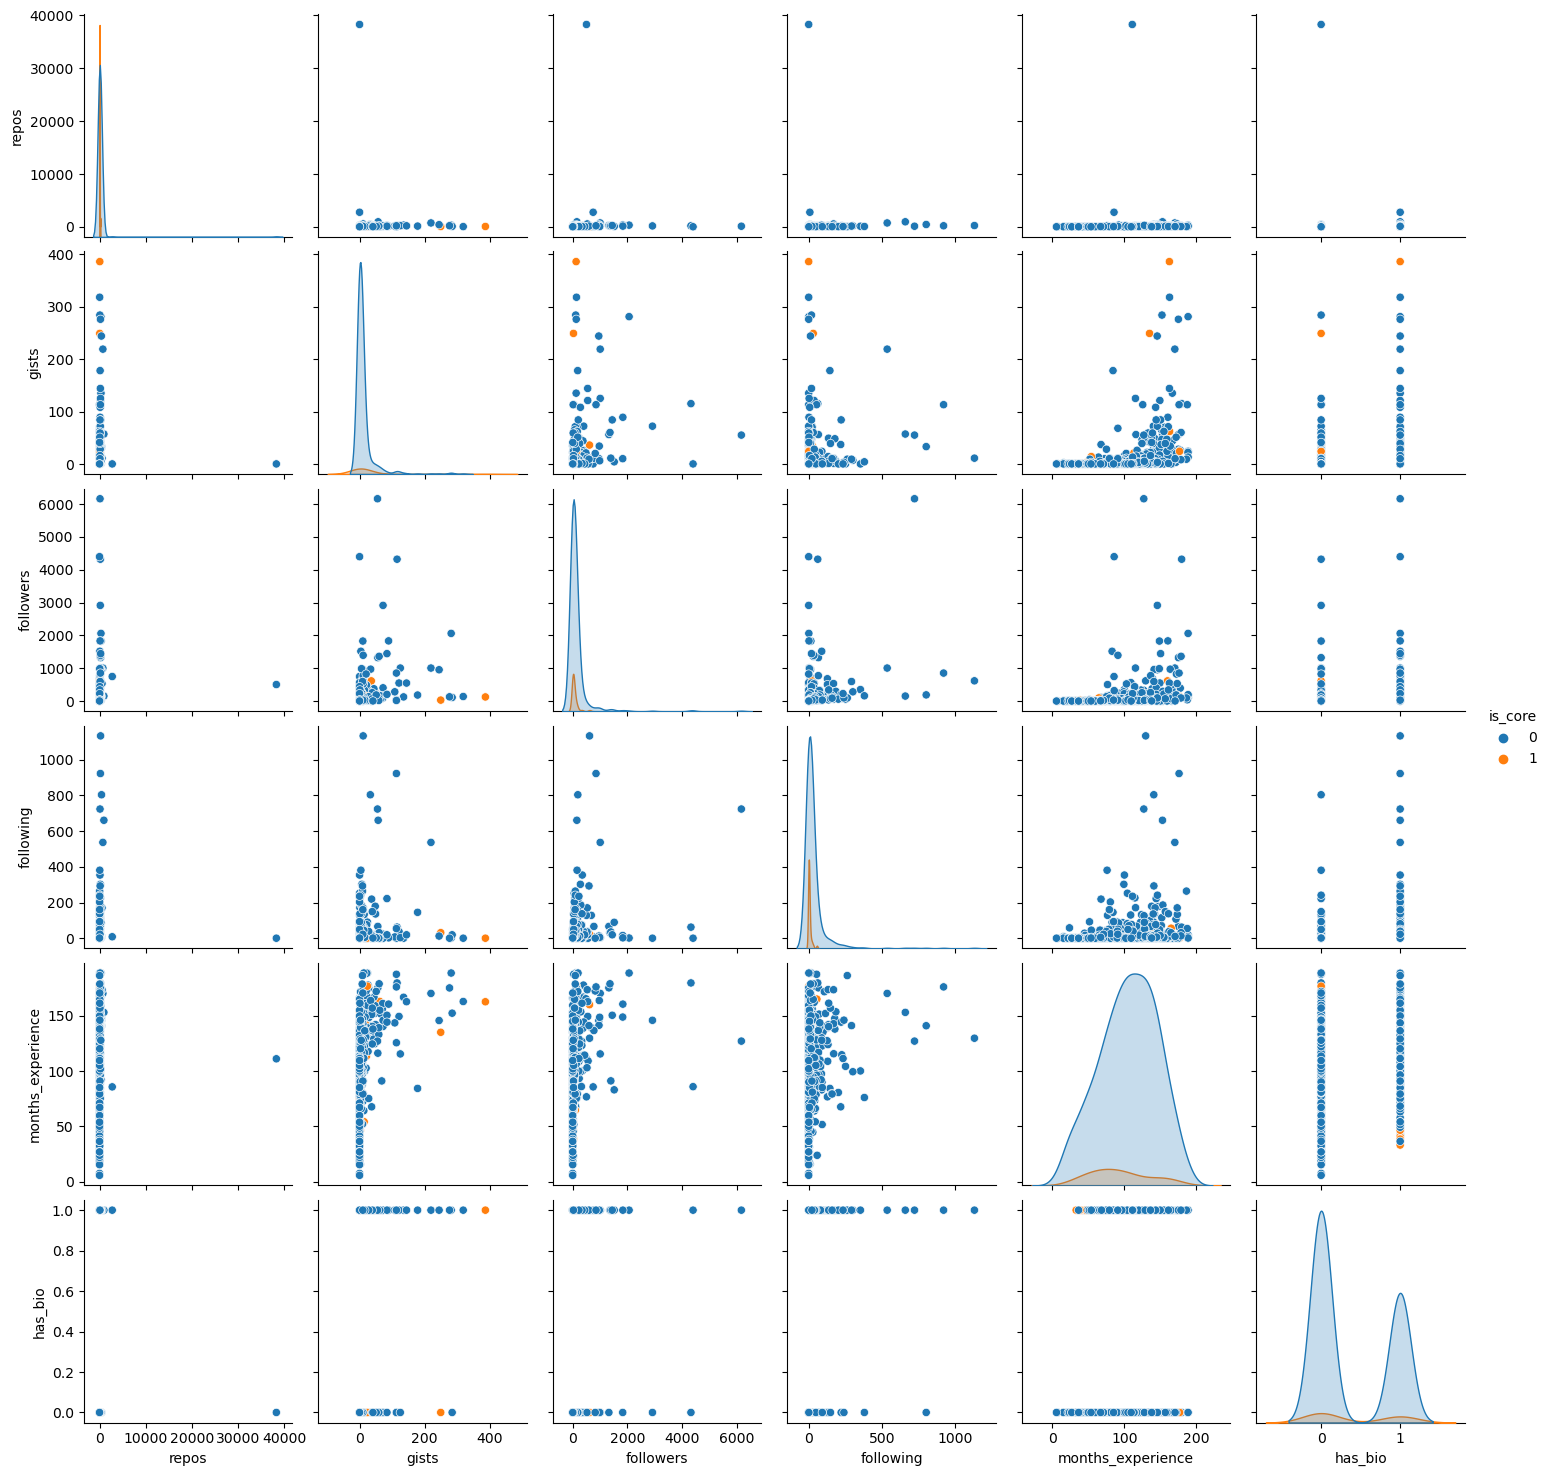

In [160]:
sns.pairplot(c2, hue = 'is_core')

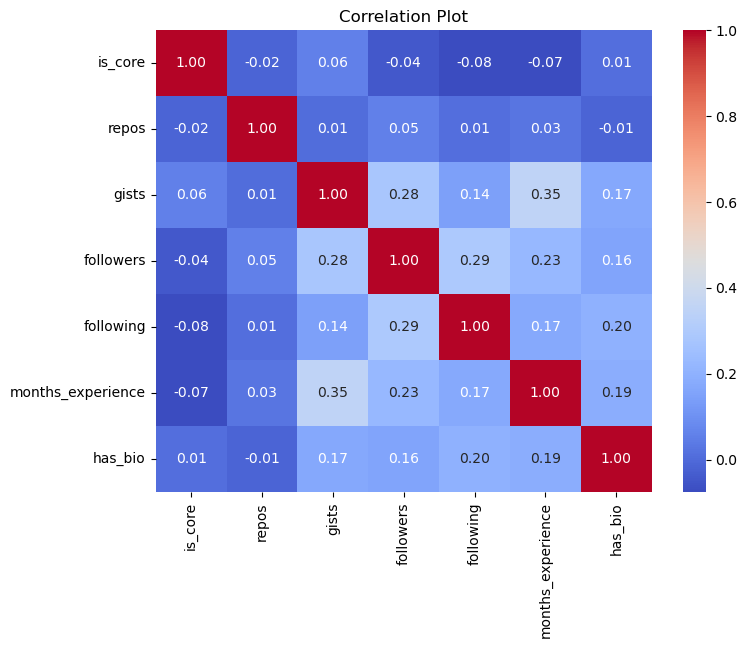

In [161]:
# Calculating the correlation matrix
correlation_matrix = c2.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [162]:
x = c2.drop(columns='is_core').to_numpy()
y = c2['is_core'].to_numpy()
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
c2_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
c2_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
c2_adasyn['has_bio'] = c2_adasyn['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
c2_adasyn

repos      gists   followers  following  months_experience  \
0        68.000000   2.000000  167.000000  87.000000          97.590000   
1     38287.000000   0.000000  503.000000   0.000000         111.120000   
2      2749.000000   0.000000  747.000000   8.000000          85.700000   
3        12.000000   1.000000    5.000000   2.000000          45.650000   
4        16.000000   0.000000   79.000000  27.000000          97.630000   
...            ...        ...         ...        ...                ...   
1099     45.122584   9.091938  140.378831   7.832862         113.898592   
1100     85.923542  18.021845  111.109226   0.501820         147.706714   
1101     37.262767   3.197075  140.133211  10.534674          88.982970   
1102    115.218780  47.853921  141.000000   1.000000         168.222151   
1103     52.154306  14.365729  140.598572   5.415707         136.189149   

      has_bio  is_core  
0           1        0  
1           0        0  
2           1        0  
3           0        0  
4           1        0  
...       ...      ...  
1099        1        1  
1100        0        1  
1101        1        1  
1102        0        1  
1103        0        1  

[1104 rows x 7 columns]

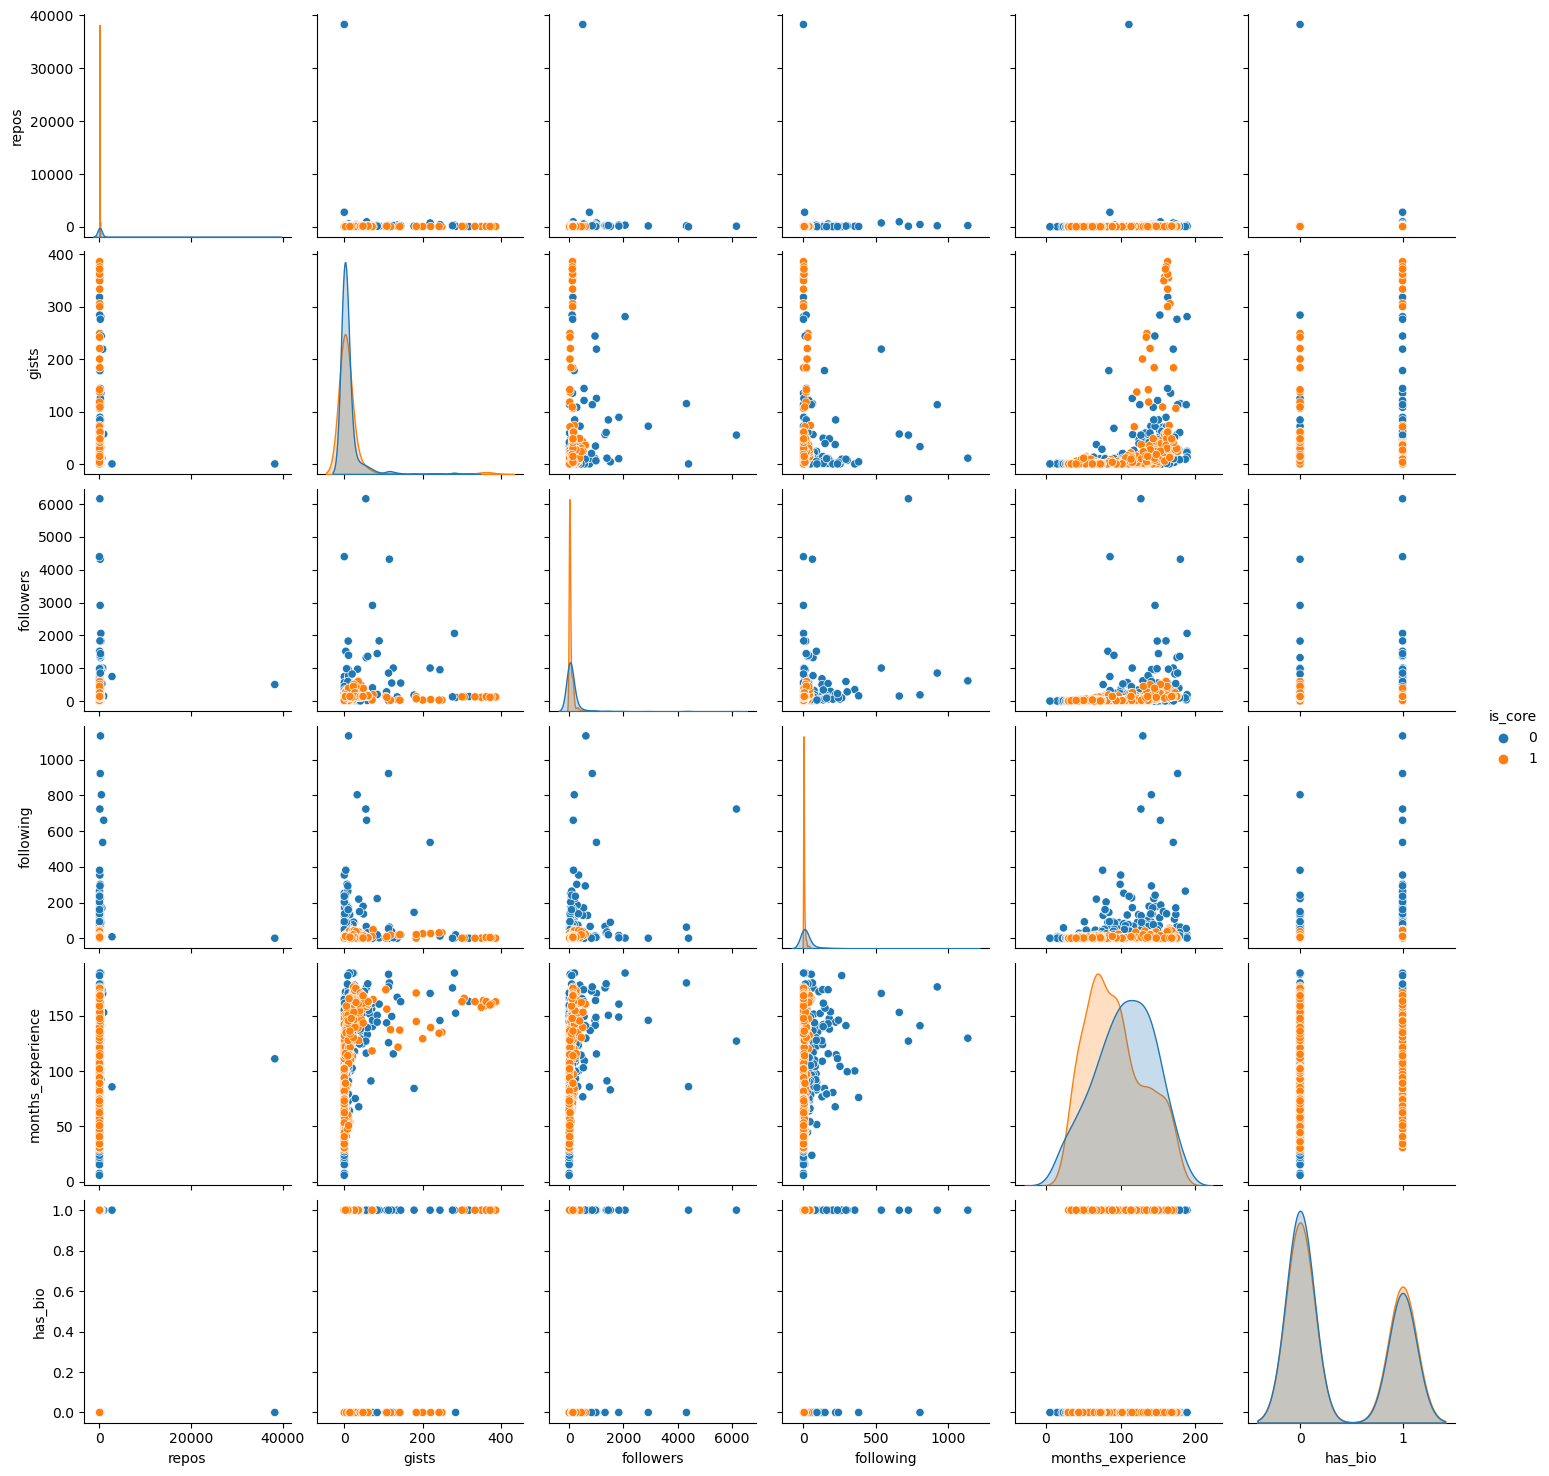

In [163]:
sns.pairplot(c2_adasyn, hue = 'is_core')

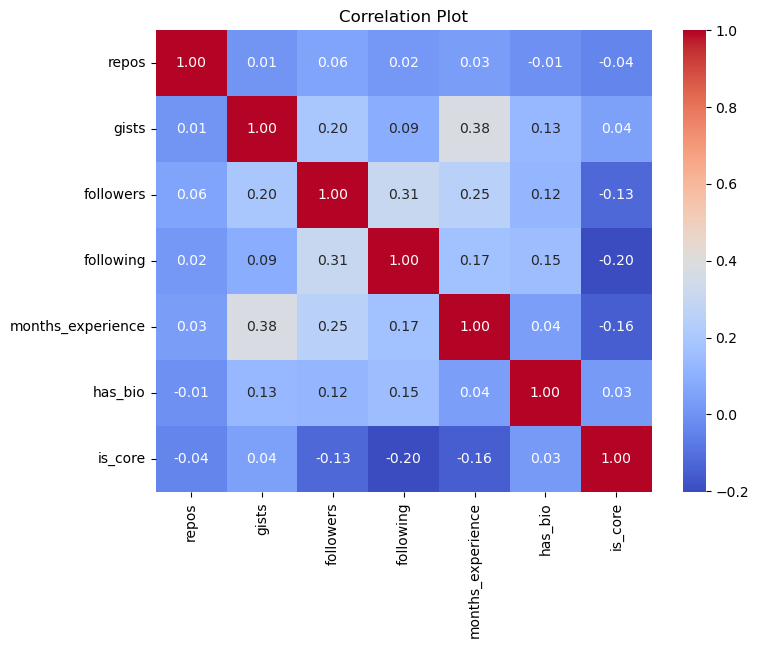

In [164]:
# Calculating the correlation matrix
correlation_matrix = c2_adasyn.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [165]:
c3_cols = ['umijs/umi', 'netbox-community/netbox', 'grafana/loki', 'awsdocs/aws-doc-sdk-examples', 'vueuse/vueuse',
     'yuzu-emu/yuzu', 'TanStack/query', 'lvgl/lvgl', 'arendst/Tasmota', 'Aircoookie/WLED']

# Filtering rows where 'Name' is in the include_list
filtered_c3 = df1[df1['name_with_owner'].isin(c3_cols)]
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']
# Subset the DataFrame based on the selected columns
c3 = filtered_c3[selected_columns]

In [166]:
print(c3['is_core'].value_counts())

0    3571
1      83
Name: is_core, dtype: int64


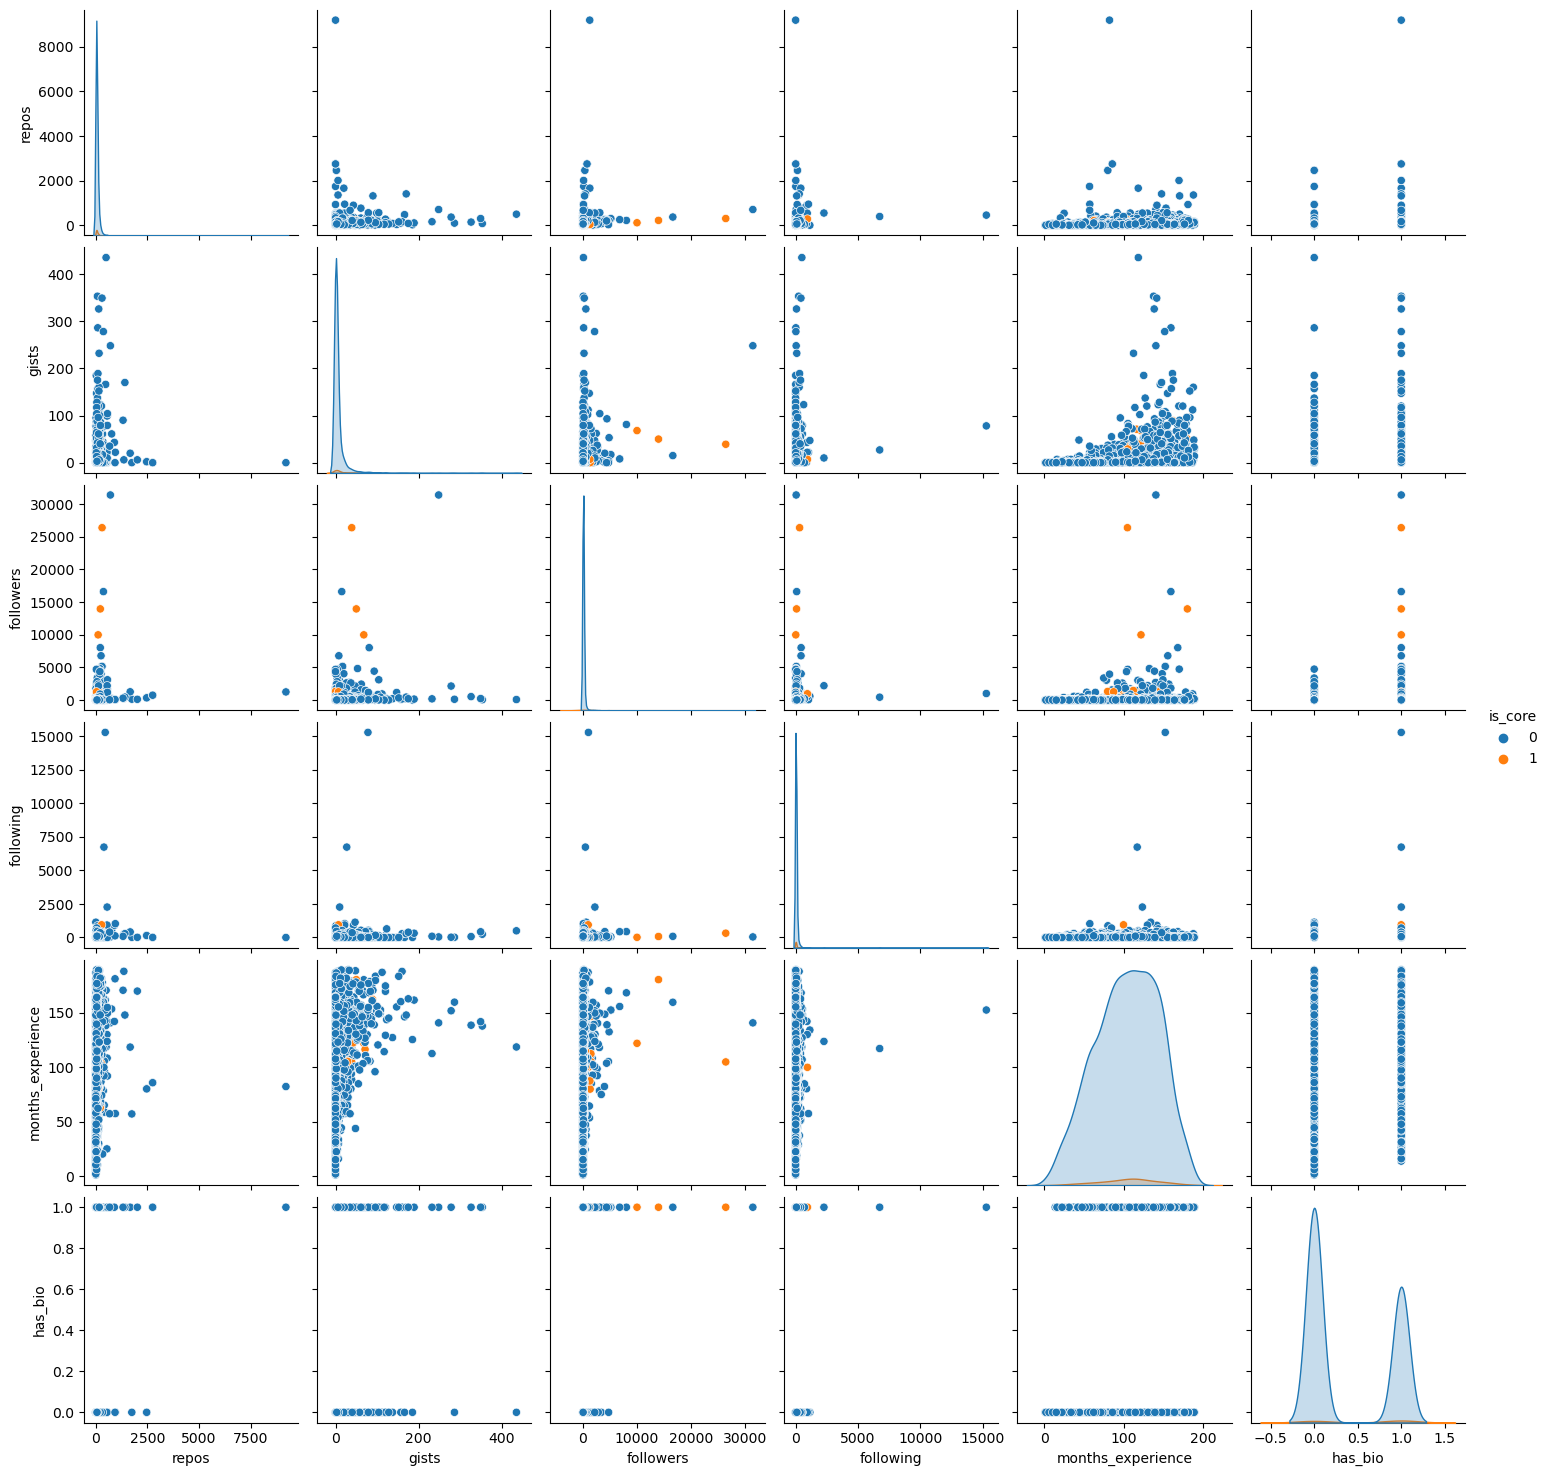

In [167]:
sns.pairplot(c3, hue = 'is_core')

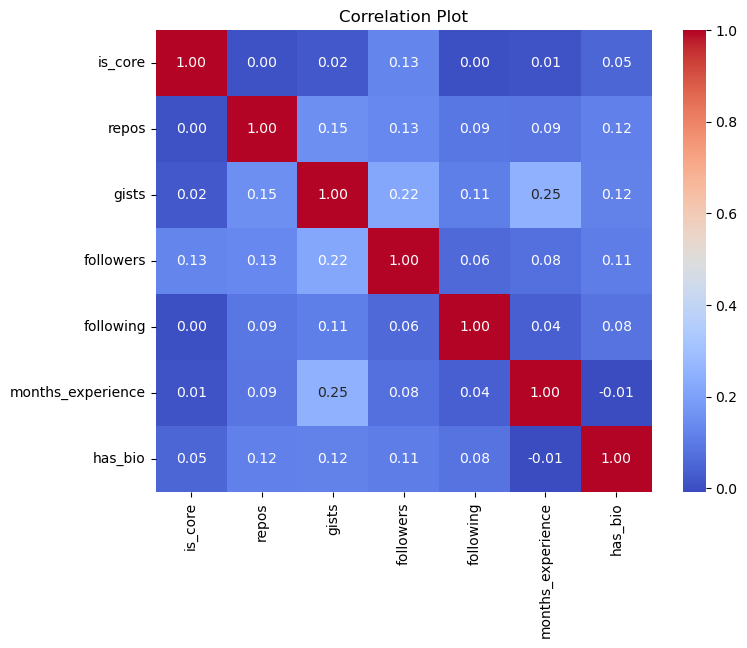

In [168]:
# Calculating the correlation matrix
correlation_matrix = c3.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [169]:
x = c3.drop(columns='is_core').to_numpy()
y = c3['is_core'].to_numpy()
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
c3_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
c3_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
c3_adasyn['has_bio'] = c3_adasyn['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
c3_adasyn

repos  gists    followers  following  months_experience  has_bio  \
0     151.000000    6.0   235.000000  36.000000         125.650000        1   
1      55.000000    0.0    21.000000   3.000000         130.540000        0   
2     136.000000    3.0     9.000000  19.000000          70.950000        1   
3     548.000000   19.0  1707.000000   5.000000         108.310000        0   
4     160.000000    8.0   331.000000  16.000000         122.330000        0   
...          ...    ...          ...        ...                ...      ...   
7148    5.477390    0.0     2.844485   0.922243          32.150632        1   
7149    0.615002    0.0     0.461252   0.153751          27.653353        0   
7150    4.000000    0.0     3.723569   0.758810          33.204242        1   
7151    4.803402    0.0     8.021262   0.799150          35.348092        1   
7152    4.000000    0.0     4.172562   0.609146          33.939092        1   

      is_core  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
7148        1  
7149        1  
7150        1  
7151        1  
7152        1  

[7153 rows x 7 columns]

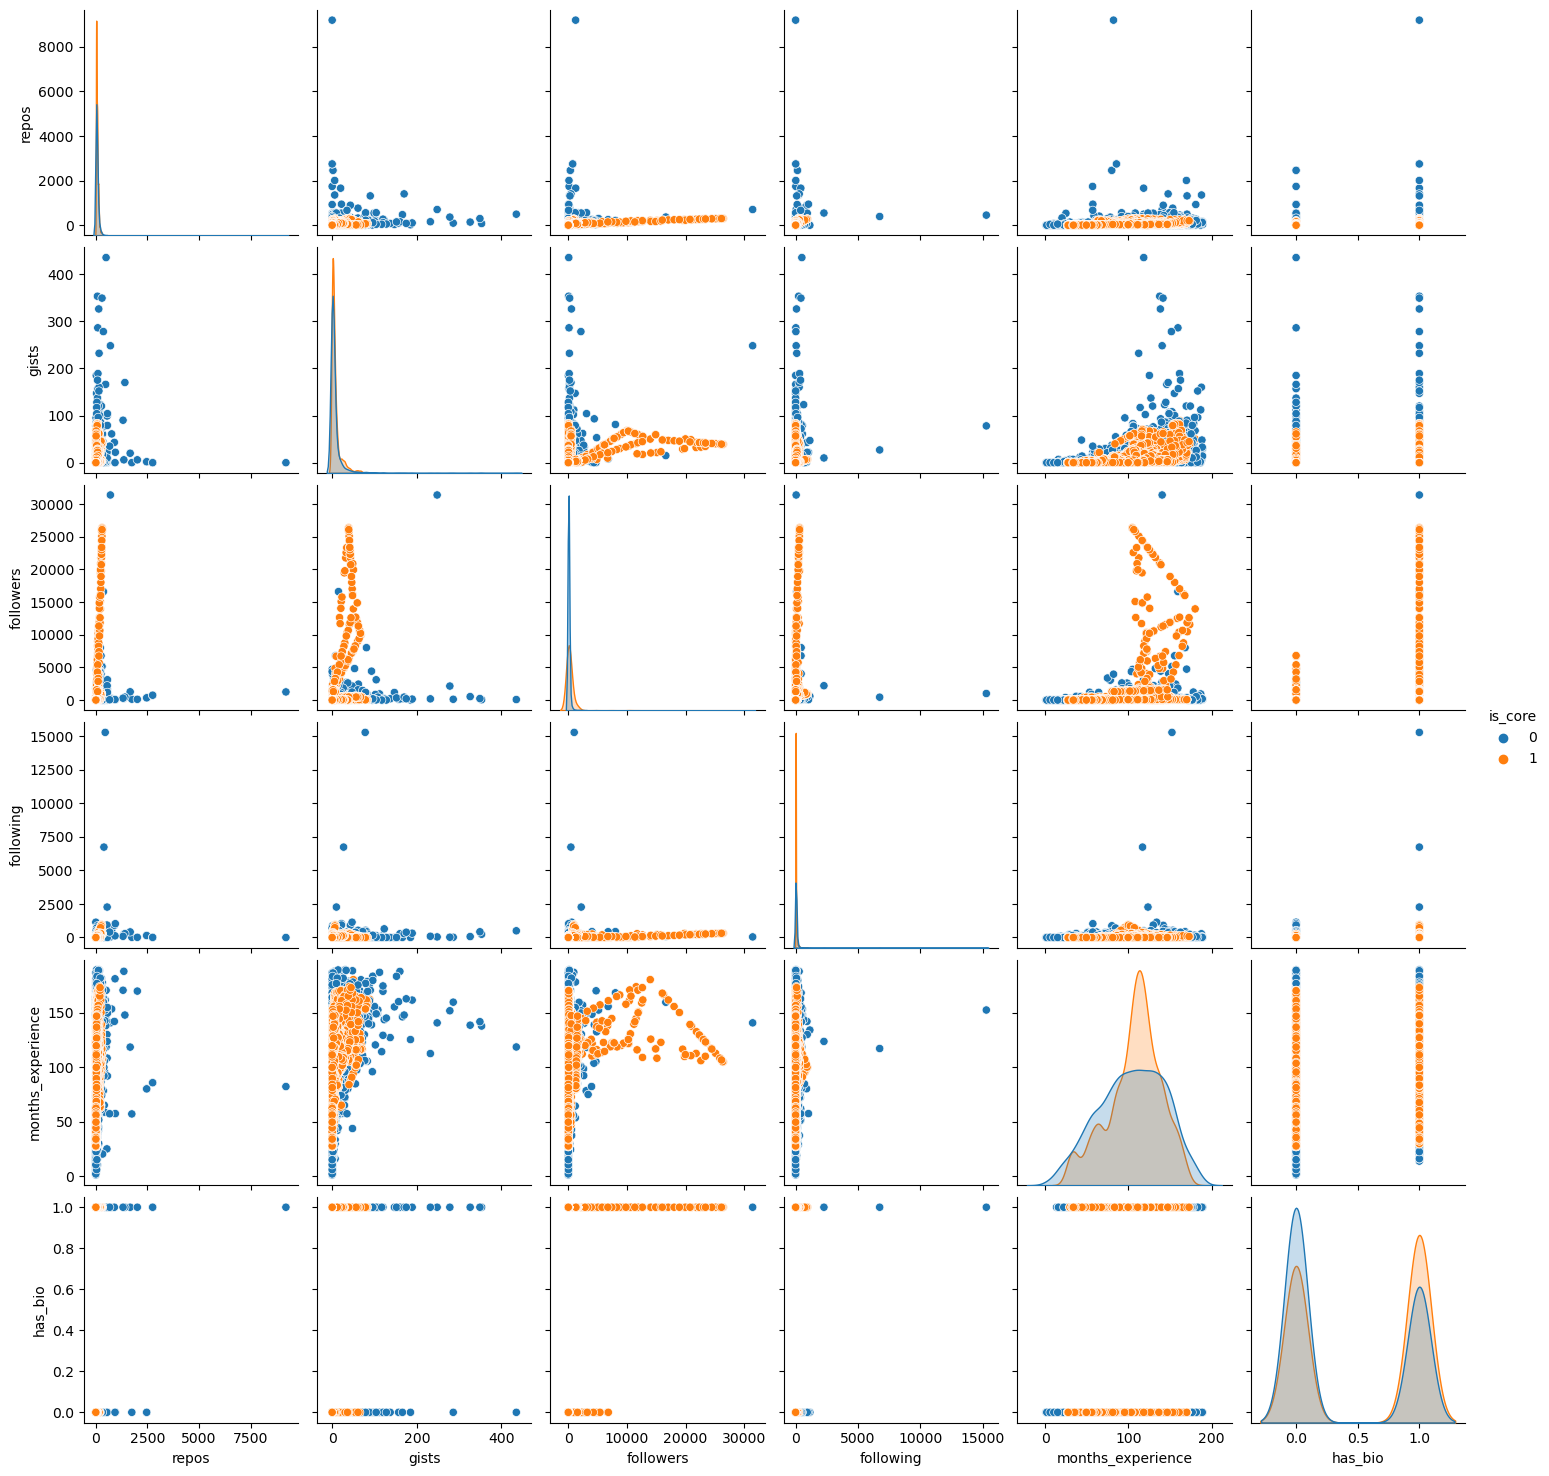

In [170]:
sns.pairplot(c3_adasyn, hue = 'is_core')

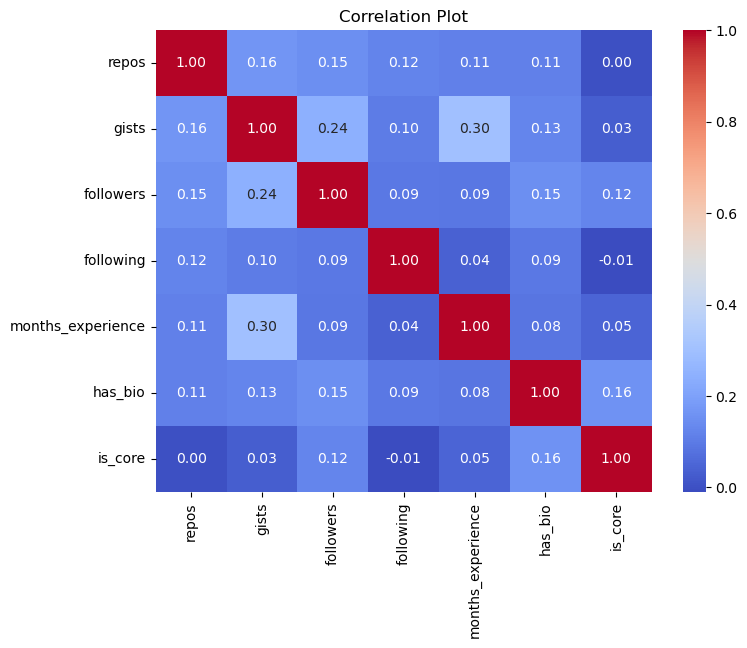

In [171]:
# Calculating the correlation matrix
correlation_matrix = c3_adasyn.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [172]:
c1_cols = c2_cols + c3_cols

In [173]:
c1_cols

['microsoft/azuredatastudio',
 'xamarin/xamarin-macios',
 'pingcap/docs',
 'umijs/umi',
 'netbox-community/netbox',
 'grafana/loki',
 'awsdocs/aws-doc-sdk-examples',
 'vueuse/vueuse',
 'yuzu-emu/yuzu',
 'TanStack/query',
 'lvgl/lvgl',
 'arendst/Tasmota',
 'Aircoookie/WLED']

In [174]:
filtered_c1 = df1[~df1['name_with_owner'].isin(c1_cols)]
selected_columns = ['is_core', 'repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio']
# Subset the DataFrame based on the selected columns
c1 = filtered_c1[selected_columns]

In [175]:
c1

is_core  repos  gists  followers  following  months_experience  has_bio
0           0     90      5        450         67             115.45        1
1           0     88     14       2685          7             151.54        1
2           0    102     72         42          0             166.86        0
3           0     37     15         11         10             152.46        1
4           0     50      1         58         17             137.50        1
...       ...    ...    ...        ...        ...                ...      ...
8472        0     19      0          5          1             126.98        0
8473        0      0      0          0          0              28.65        0
8474        0      1      1         13          3             124.58        1
8475        0      0      0          0          0               9.54        0
8476        0     26      0          6         16             113.27        1

[4227 rows x 7 columns]

In [176]:
print(c1['is_core'].value_counts())

0    3987
1     240
Name: is_core, dtype: int64


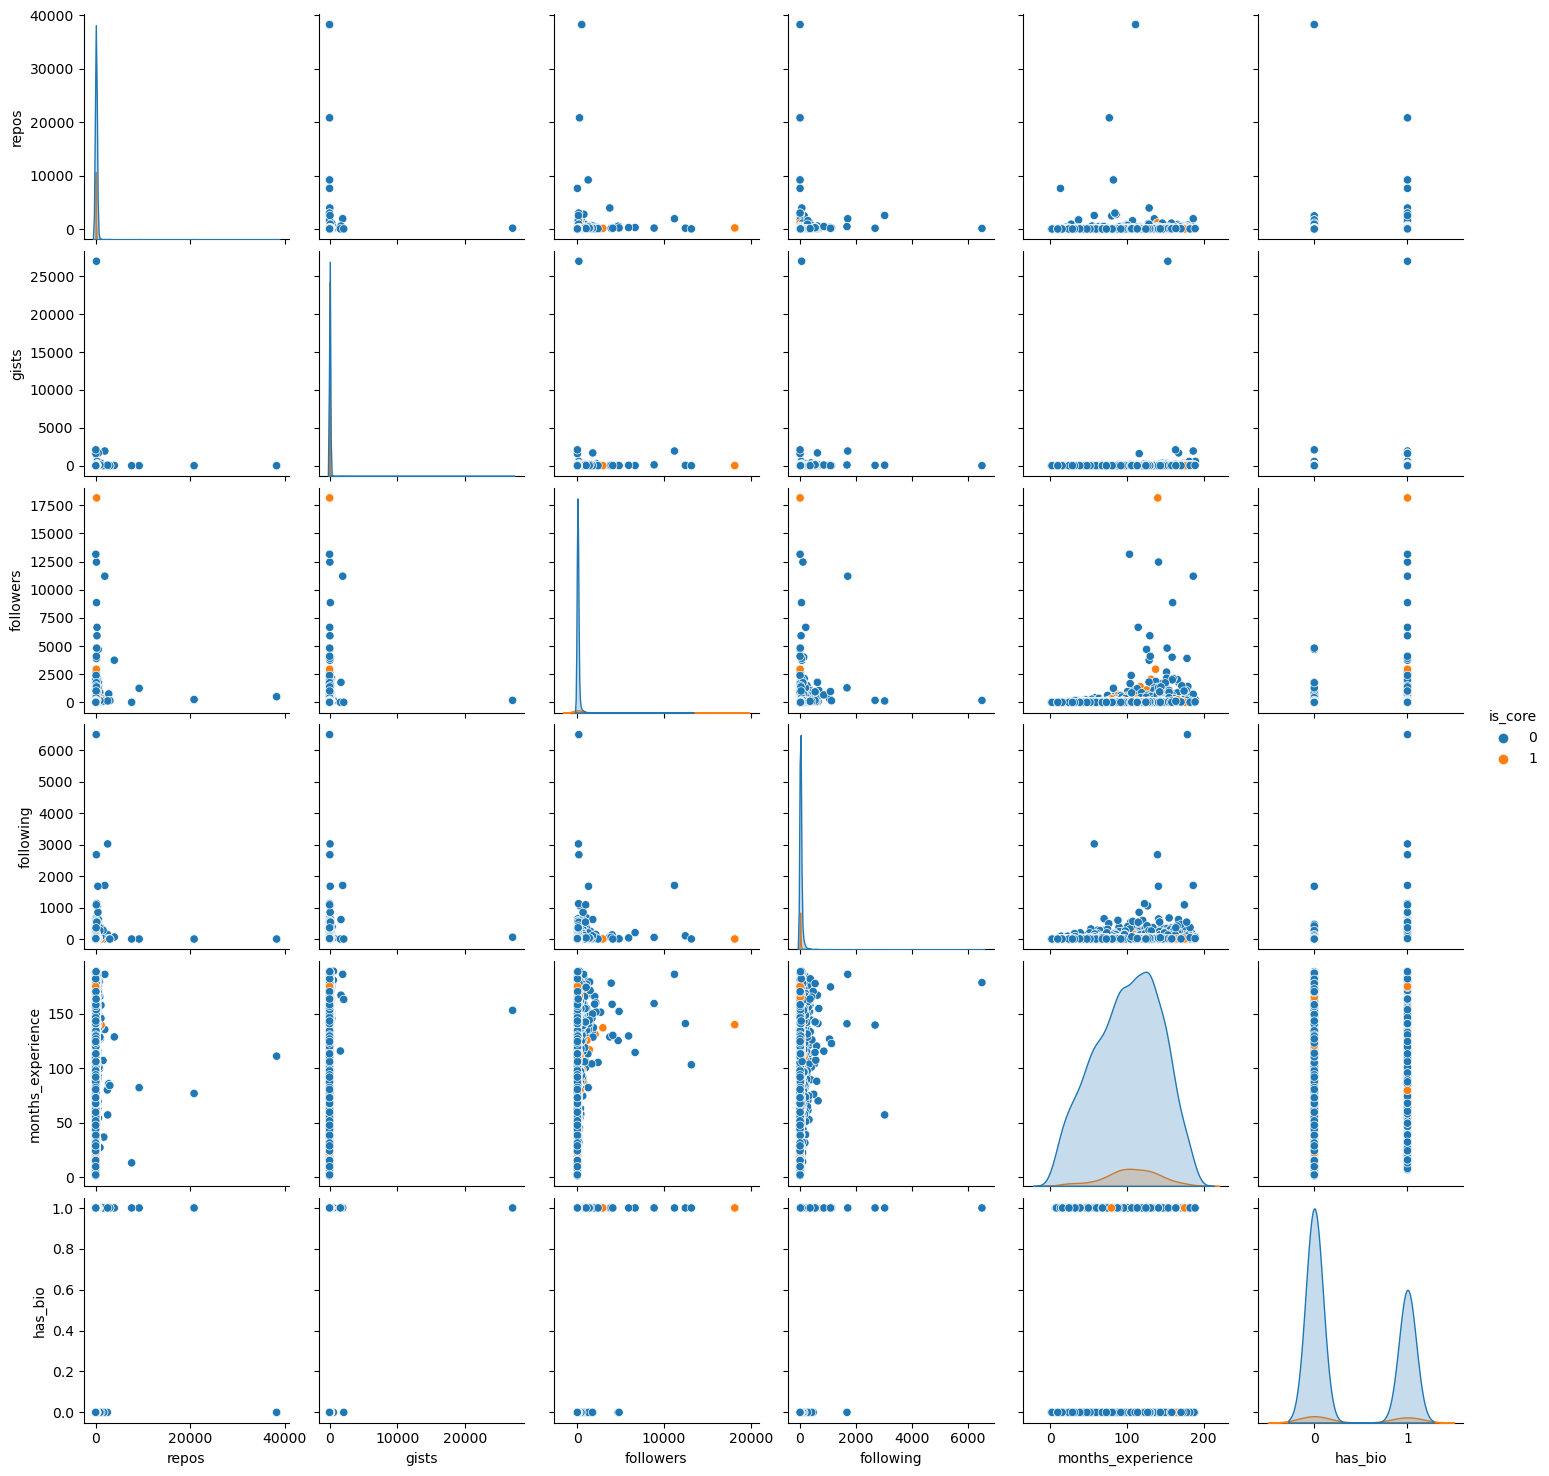

In [177]:
sns.pairplot(c1, hue = 'is_core')

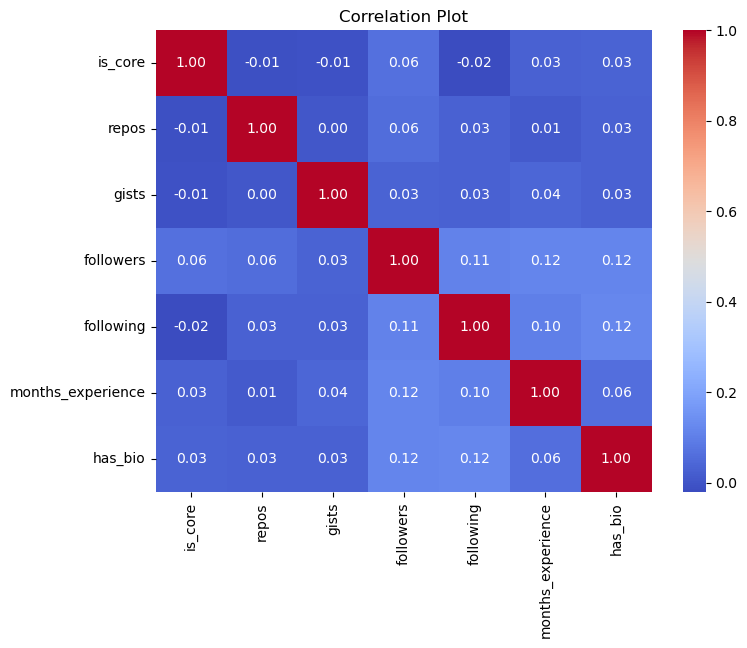

In [178]:
# Calculating the correlation matrix
correlation_matrix = c1.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [179]:
x = c1.drop(columns='is_core').to_numpy()
y = c1['is_core'].to_numpy()
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
c1_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=['repos', 'gists', 'followers', 'following', 'months_experience', 'has_bio'])  # Replace column names as needed
c1_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
c1_adasyn['has_bio'] = c1_adasyn['has_bio'].apply(lambda x: 1 if x >= 0.5 else 0)
c1_adasyn

repos      gists    followers  following  months_experience  \
0      90.000000   5.000000   450.000000  67.000000         115.450000   
1      88.000000  14.000000  2685.000000   7.000000         151.540000   
2     102.000000  72.000000    42.000000   0.000000         166.860000   
3      37.000000  15.000000    11.000000  10.000000         152.460000   
4      50.000000   1.000000    58.000000  17.000000         137.500000   
...          ...        ...          ...        ...                ...   
7968   61.000474   7.642552    12.856737   0.214184         136.988548   
7969   57.107951   3.330963     4.661926   0.000000         122.337232   
7970   59.099795   4.824846     7.649692   0.000000         128.282888   
7971   62.014397   6.995886    12.000000   0.008227         136.885455   
7972   60.804653   6.103490    10.206979   0.000000         133.371888   

      has_bio  is_core  
0           1        0  
1           1        0  
2           0        0  
3           1        0  
4           1        0  
...       ...      ...  
7968        0        1  
7969        1        1  
7970        0        1  
7971        0        1  
7972        0        1  

[7973 rows x 7 columns]

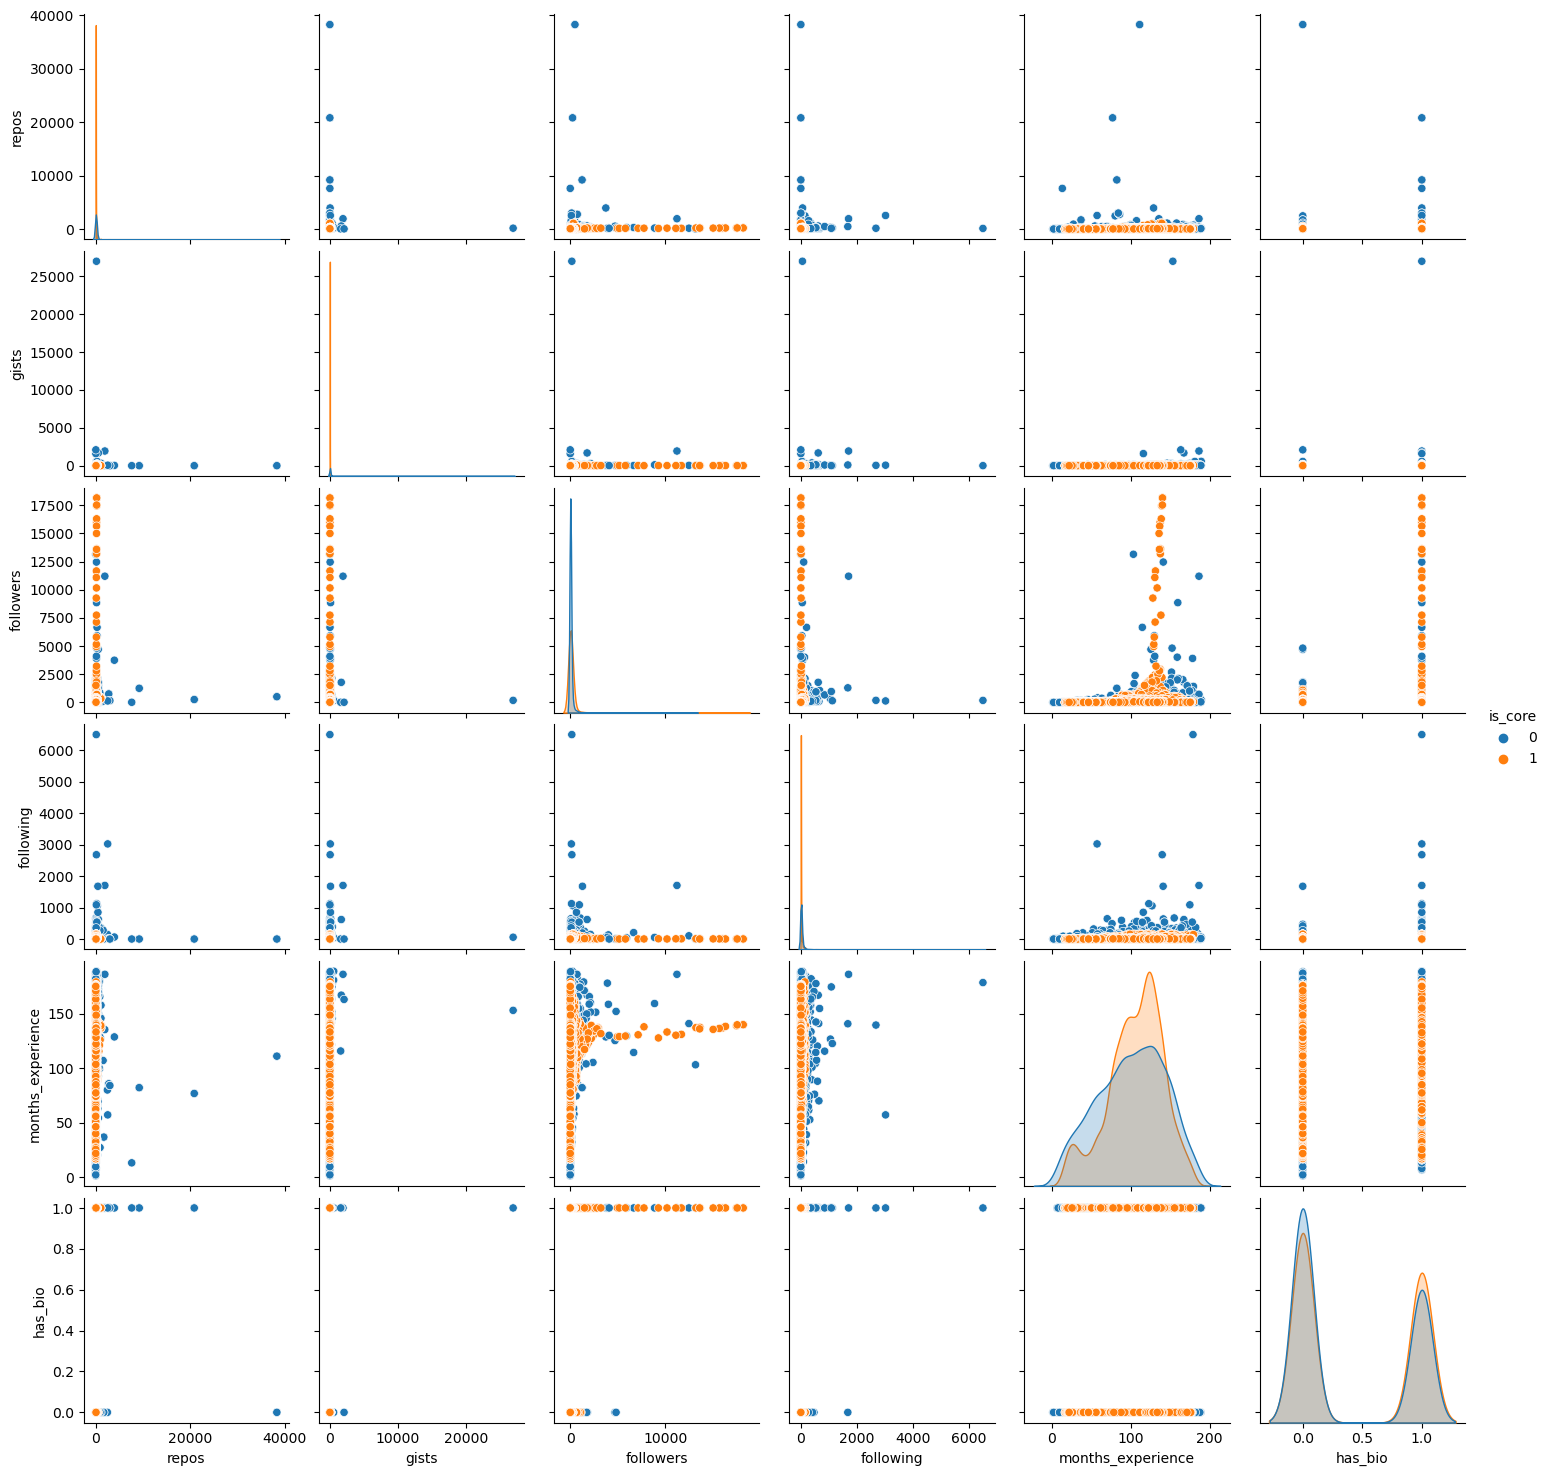

In [180]:
sns.pairplot(c1_adasyn, hue = 'is_core')

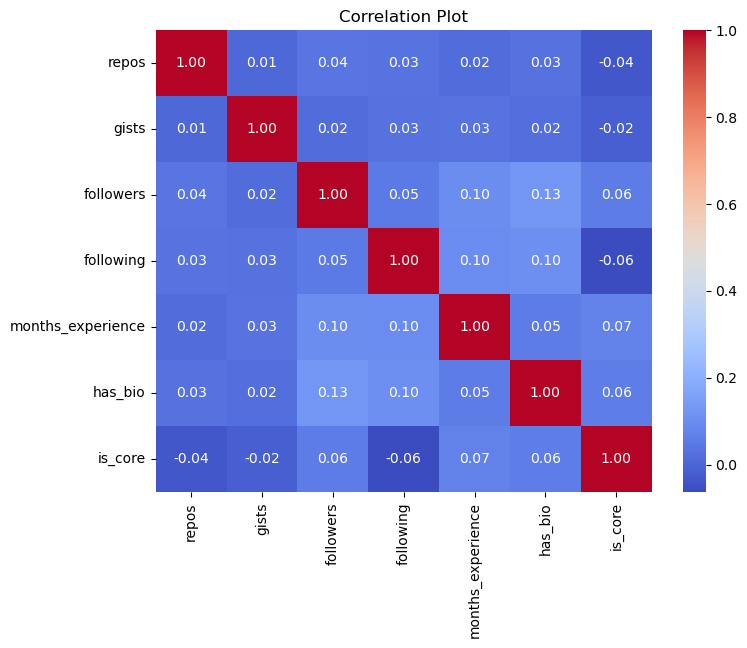

In [181]:
# Calculating the correlation matrix
correlation_matrix = c1_adasyn.corr()

# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [182]:
ks_adasyn_c12 = []
p_adasyn_c12 = []
ks_adasyn_c13 = []
p_adasyn_c13 = []
ks_adasyn_c23 = []
p_adasyn_c23 = []
for i in range(5):
    y1 = c1_adasyn.iloc[:,i]
    y2 = c2_adasyn.iloc[:,i]
    y3 = c3_adasyn.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = ks_2samp(y1, y2)
    ks_stat2, ks_pvalue2 = ks_2samp(y1, y3)
    ks_stat3, ks_pvalue3 = ks_2samp(y2, y3)
    
    ks_adasyn_c12.append(ks_stat1)
    ks_adasyn_c13.append(ks_stat2)
    ks_adasyn_c23.append(ks_stat3)
    
    p_adasyn_c12.append(ks_pvalue1)
    p_adasyn_c13.append(ks_pvalue2)
    p_adasyn_c23.append(ks_pvalue3)

In [183]:
for test in p_adasyn_c12:
    print(test < 0.05)

False
True
True
True
True


In [184]:
for test in p_adasyn_c13:
    print(test < 0.05)

True
True
True
True
True


In [185]:
for test in p_adasyn_c23:
    print(test < 0.05)

True
True
True
True
True


In [186]:
mu_stat_adasyn_c12 = []
mu_p_adasyn_c12 = []
mu_stat_adasyn_c13 = []
mu_p_adasyn_c13 = []
mu_stat_adasyn_c23 = []
mu_p_adasyn_c23 = []
for i in range(5):
    y1 = c1_adasyn.iloc[:,i]
    y2 = c2_adasyn.iloc[:,i]
    y3 = c3_adasyn.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = mannwhitneyu(y1, y2)
    ks_stat2, ks_pvalue2 = mannwhitneyu(y1, y3)
    ks_stat3, ks_pvalue3 = mannwhitneyu(y2, y3)
    
    mu_stat_adasyn_c12.append(ks_stat1)
    mu_stat_adasyn_c13.append(ks_stat2)
    mu_stat_adasyn_c23.append(ks_stat3)
    
    mu_p_adasyn_c12.append(ks_pvalue1)
    mu_p_adasyn_c13.append(ks_pvalue2)
    mu_p_adasyn_c23.append(ks_pvalue3)

In [187]:
for test in mu_p_adasyn_c12:
    print(test < 0.05)

False
False
False
True
True


In [188]:
for test in mu_p_adasyn_c13:
    print(test < 0.05)

True
True
True
True
True


In [189]:
for test in p_adasyn_c23:
    print(test < 0.05)

True
True
True
True
True


In [190]:
print(c1['is_core'].value_counts())
print(c2['is_core'].value_counts())
print(c3['is_core'].value_counts())

0    3987
1     240
Name: is_core, dtype: int64
0    553
1     43
Name: is_core, dtype: int64
0    3571
1      83
Name: is_core, dtype: int64


In [72]:
x1 = c3_adasyn.drop(columns=['is_core', 'has_bio'])

In [73]:
x1

repos  gists    followers  following  months_experience
0     151.000000    6.0   235.000000  36.000000         125.650000
1      55.000000    0.0    21.000000   3.000000         130.540000
2     136.000000    3.0     9.000000  19.000000          70.950000
3     548.000000   19.0  1707.000000   5.000000         108.310000
4     160.000000    8.0   331.000000  16.000000         122.330000
...          ...    ...          ...        ...                ...
7148    5.477390    0.0     2.844485   0.922243          32.150632
7149    0.615002    0.0     0.461252   0.153751          27.653353
7150    4.000000    0.0     3.723569   0.758810          33.204242
7151    4.803402    0.0     8.021262   0.799150          35.348092
7152    4.000000    0.0     4.172562   0.609146          33.939092

[7153 rows x 5 columns]

In [74]:
x2 = c3_adasyn[['is_core', 'has_bio']].copy()

In [75]:
scaler = StandardScaler()
x1_scale = scaler.fit_transform(x1)
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(x1_scale)


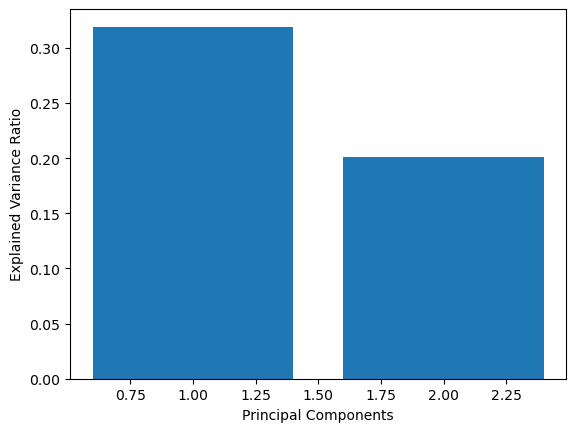

In [76]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [77]:
pc_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

In [78]:
pc_df

PC1       PC2
0     0.466692 -0.077461
1    -0.039472 -0.400500
2    -0.451973  0.685382
3     2.141384  0.878009
4     0.513142 -0.097252
...        ...       ...
7148 -1.443724  0.969364
7149 -1.516648  1.023874
7150 -1.434508  0.949721
7151 -1.403705  0.919580
7152 -1.425218  0.938148

[7153 rows x 2 columns]

In [79]:
combined_df = pd.concat([pc_df, x2], axis = 1)

In [80]:
combined_df

PC1       PC2  is_core  has_bio
0     0.466692 -0.077461        0        1
1    -0.039472 -0.400500        0        0
2    -0.451973  0.685382        0        1
3     2.141384  0.878009        0        0
4     0.513142 -0.097252        0        0
...        ...       ...      ...      ...
7148 -1.443724  0.969364        1        1
7149 -1.516648  1.023874        1        0
7150 -1.434508  0.949721        1        1
7151 -1.403705  0.919580        1        1
7152 -1.425218  0.938148        1        1

[7153 rows x 4 columns]

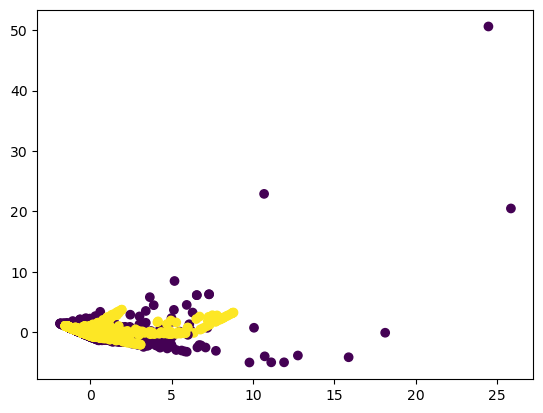

In [81]:
plt.scatter(combined_df.PC1, combined_df.PC2, c=combined_df.is_core)

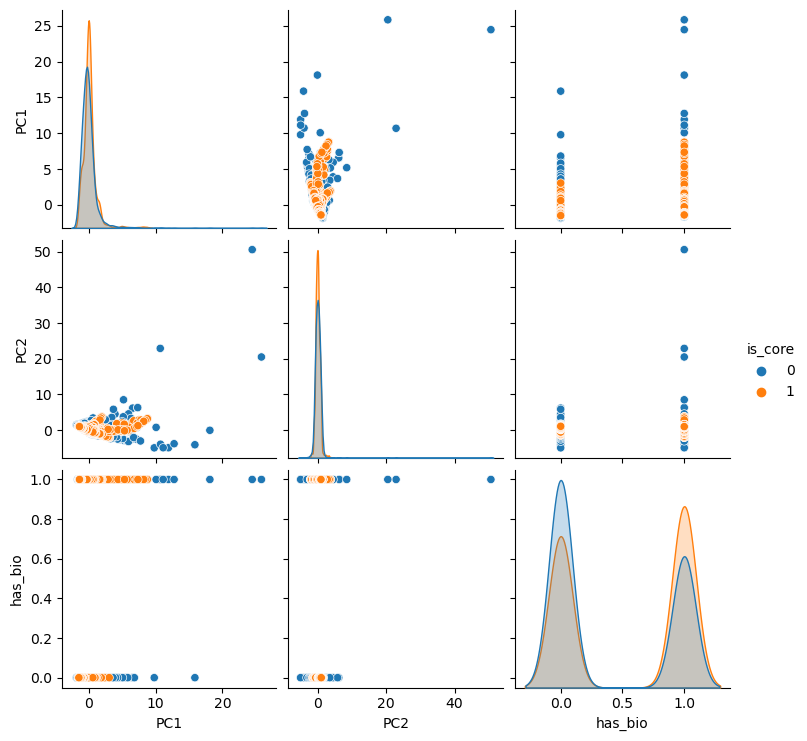

In [82]:
sns.pairplot(combined_df, hue = 'is_core')

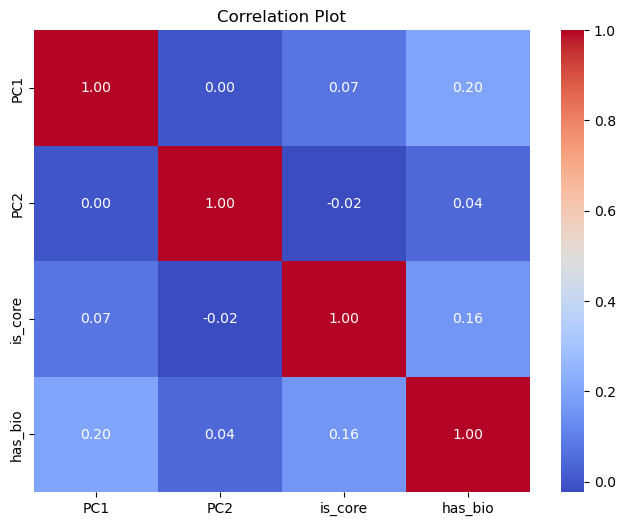

In [83]:
# Creating a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [84]:
# Separate features and target variable
x1 = c3_adasyn.drop(columns=['is_core'])
y = c3_adasyn['is_core']

# Encode the categorical variable
X_encoded = pd.get_dummies(x1, columns=['has_bio'], drop_first=True)
X_encoded

repos  gists    followers  following  months_experience  has_bio_1
0     151.000000    6.0   235.000000  36.000000         125.650000          1
1      55.000000    0.0    21.000000   3.000000         130.540000          0
2     136.000000    3.0     9.000000  19.000000          70.950000          1
3     548.000000   19.0  1707.000000   5.000000         108.310000          0
4     160.000000    8.0   331.000000  16.000000         122.330000          0
...          ...    ...          ...        ...                ...        ...
7148    5.477390    0.0     2.844485   0.922243          32.150632          1
7149    0.615002    0.0     0.461252   0.153751          27.653353          0
7150    4.000000    0.0     3.723569   0.758810          33.204242          1
7151    4.803402    0.0     8.021262   0.799150          35.348092          1
7152    4.000000    0.0     4.172562   0.609146          33.939092          1

[7153 rows x 6 columns]

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis(solver='eigen', store_covariance=True, n_components = 1)
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform the test set
X_test_lda = lda.transform(X_test)

# Train a classifier on the transformed data
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_lda)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5870020964360587


In [86]:
lda_df = pd.DataFrame(X_train_lda)

In [87]:
lda_df

0
0    -2.372844
1    -0.266937
2    -1.879038
3    -0.370794
4    -0.664306
...        ...
5717 -2.049136
5718 -0.295889
5719 -0.267937
5720 -1.981383
5721 -0.663862

[5722 rows x 1 columns]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5953878406708596


In [89]:
selected_columns2 = ['is_core', 'issues', 'prs',
       'pr_comments_self', 'pr_comments_others', 'issues_comments_self',
       'issues_comments_others', 'pr_reactions_self', 'pr_reactions_others',
       'issues_reactions_self', 'issues_reactions_others',
       'issue_hours_to_respond_reaction', 'pr_hours_to_respond_reaction',
       'issue_hours_to_respond_comment', 'pr_hours_to_respond_comment',
       'days_to_close_issue', 'days_to_close_pr']

# Subset the DataFrame based on the selected columns
subset_df_contributions = df[selected_columns2].copy()

In [90]:
subset_df_contributions

is_core  issues  prs  pr_comments_self  pr_comments_others  \
0           0       0    1                 3                   0   
1           0       1    2                 3                   1   
2           0       0    5                17                   0   
3           0       0    3                 4                   0   
4           0       3    4                 9                   2   
...       ...     ...  ...               ...                 ...   
8439        0       1    1                 1                   0   
8440        0      21    1                 0                   0   
8441        0       0    1                 1                   0   
8442        0       0    1                 2                   0   
8443        0       0    1                 0                   0   

      issues_comments_self  issues_comments_others  pr_reactions_self  \
0                        0                       0                  0   
1                        2                       0                  0   
2                        0                       0                  0   
3                        0                       0                  0   
4                        1                       0                  2   
...                    ...                     ...                ...   
8439                     2                       0                  0   
8440                    60                       0                  0   
8441                     0                       0                  0   
8442                     0                       0                  0   
8443                     0                       1                  0   

      pr_reactions_others  issues_reactions_self  issues_reactions_others  \
0                       0                      0                        0   
1                       1                      0                        0   
2                       0                      0                        0   
3                       0                      0                        0   
4                       0                      2                        5   
...                   ...                    ...                      ...   
8439                    0                      0                        0   
8440                    0                      1                        0   
8441                    0                      0                        0   
8442                    0                      0                        0   
8443                    0                      0                        0   

      issue_hours_to_respond_reaction  pr_hours_to_respond_reaction  \
0                               0.000                         0.000   
1                               0.000                         0.242   
2                               0.000                         0.000   
3                               0.000                         0.000   
4                            4099.324                         0.000   
...                               ...                           ...   
8439                            0.000                         0.000   
8440                            0.000                         0.000   
8441                            0.000                         0.000   
8442                            0.000                         0.000   
8443                            0.000                         0.000   

      issue_hours_to_respond_comment  pr_hours_to_respond_comment  \
0                              0.000                        0.000   
1                              0.000                       20.260   
2                              0.000                        0.000   
3                              0.000                        0.000   
4                              0.000                       80.227   
...                              ...                          ...   
8439                           0.000               

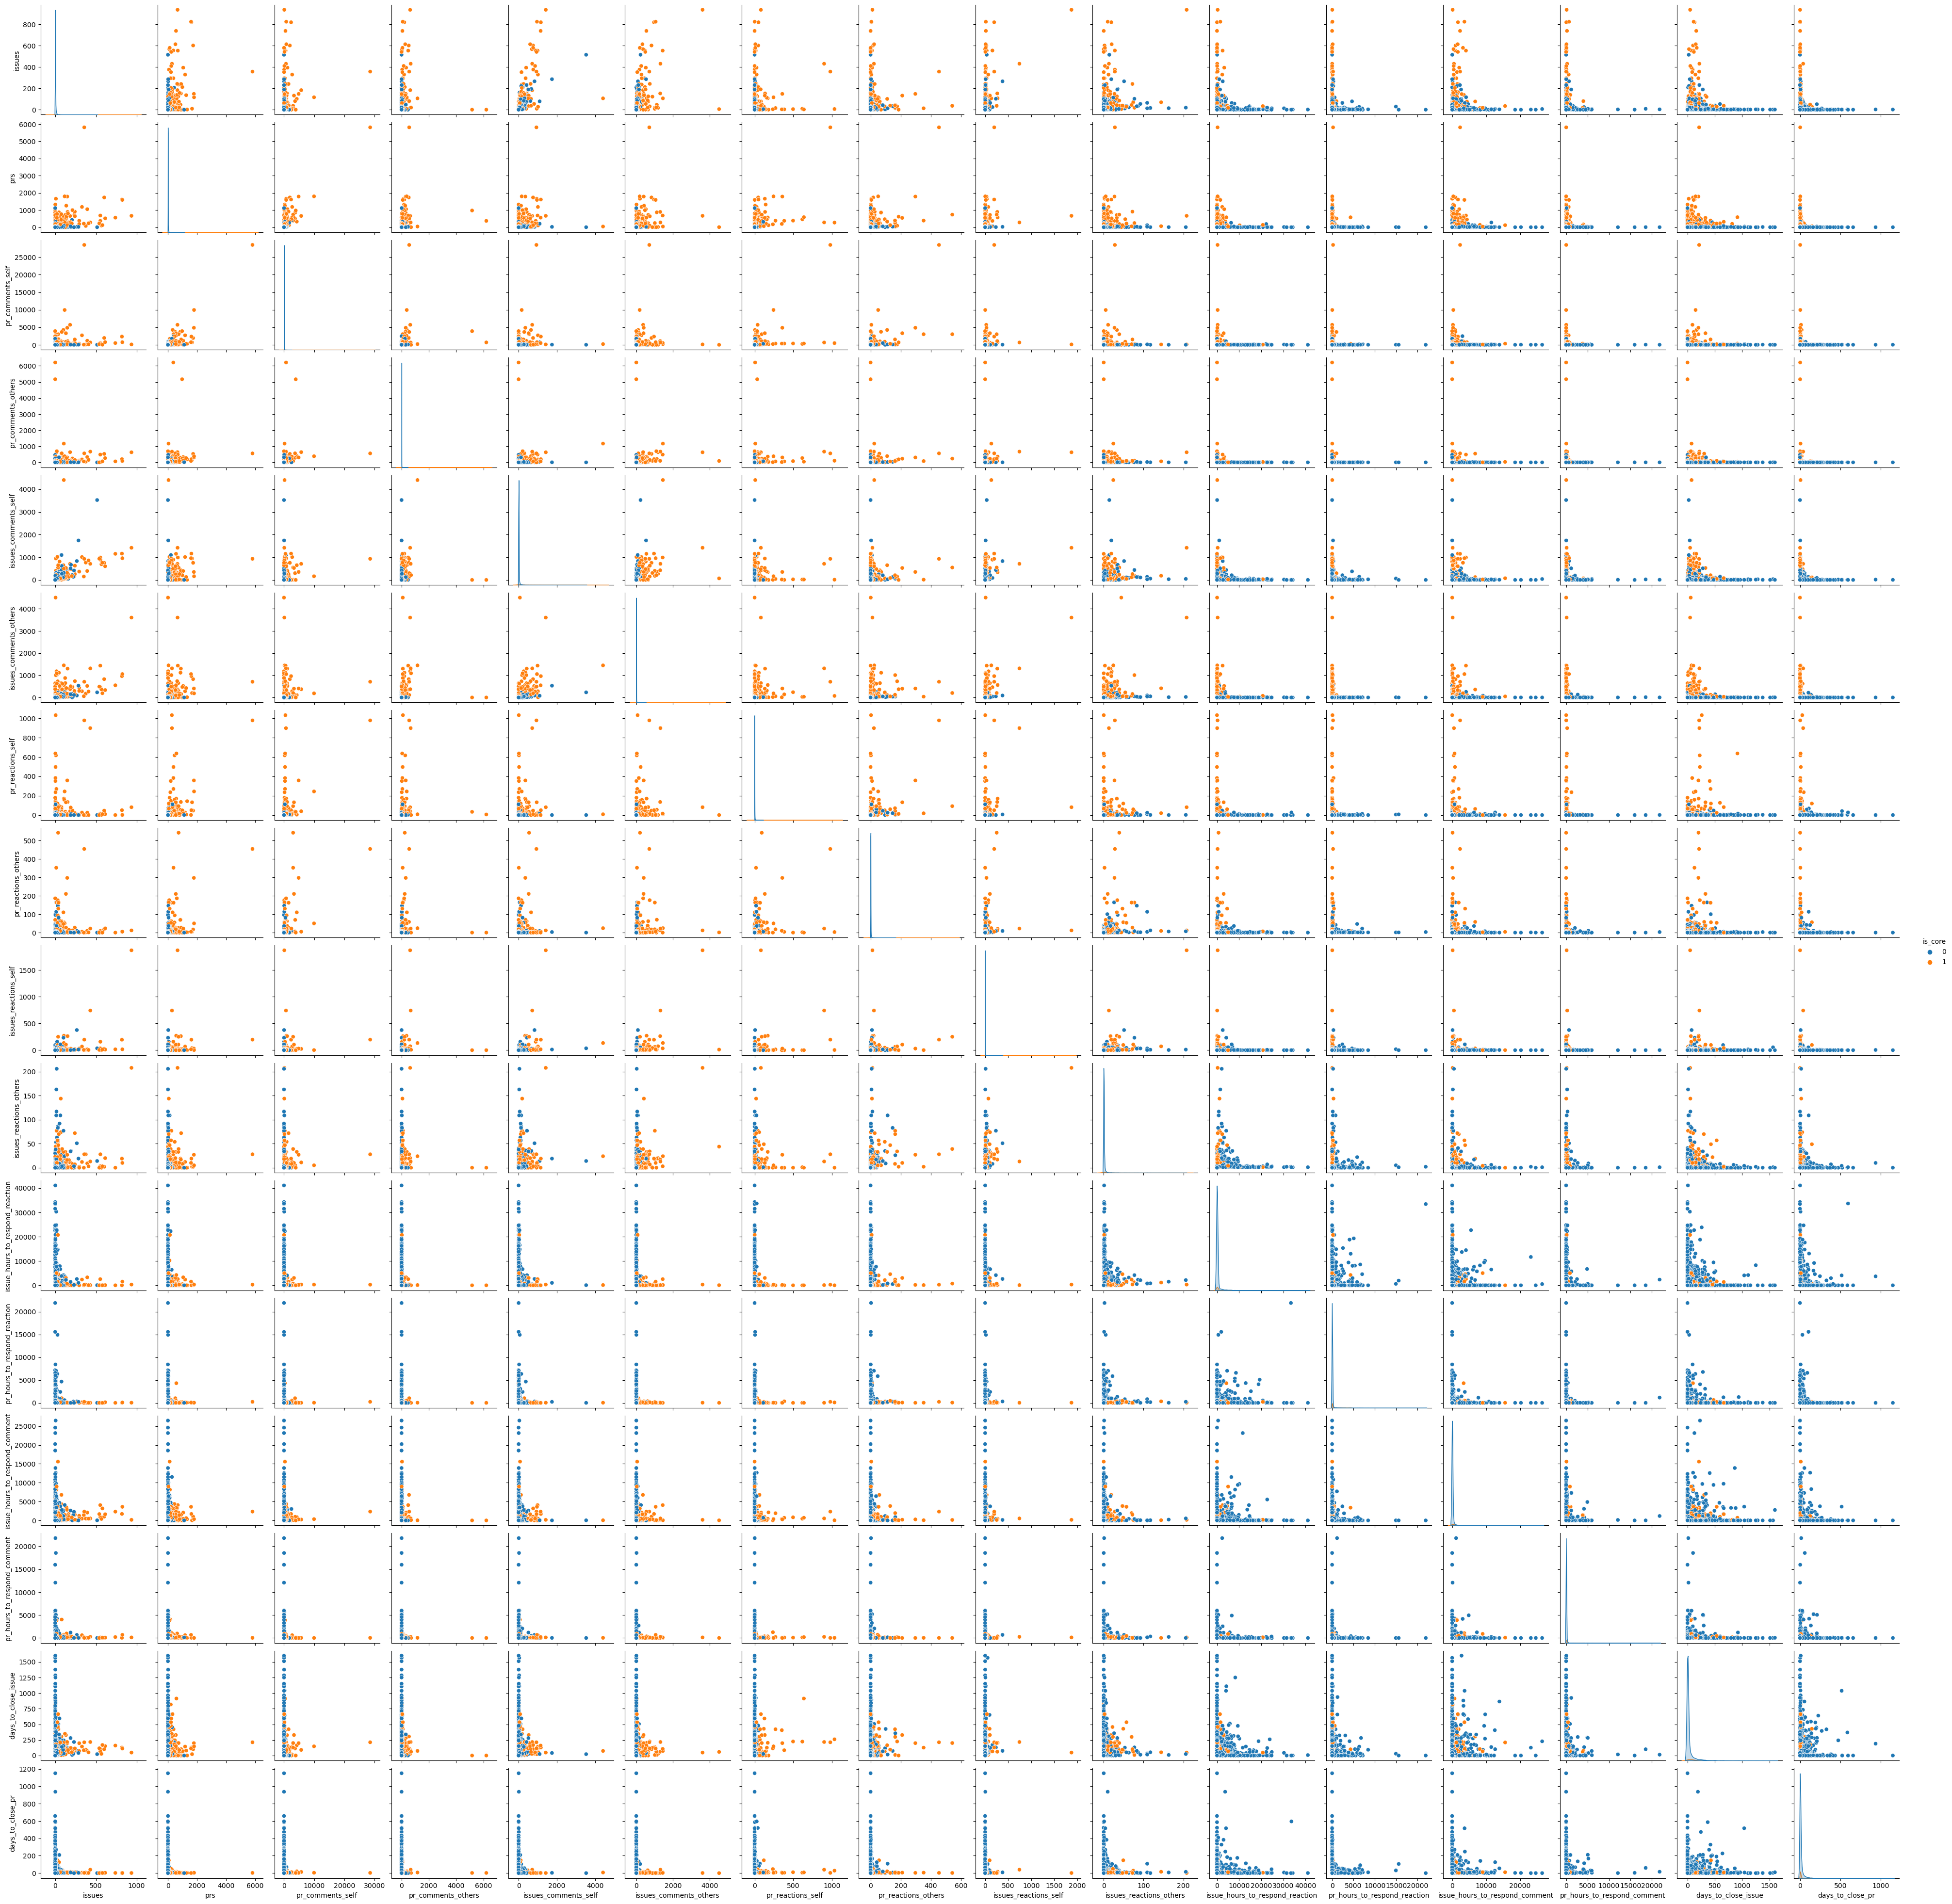

In [91]:
sns.pairplot(subset_df_contributions, hue = 'is_core')

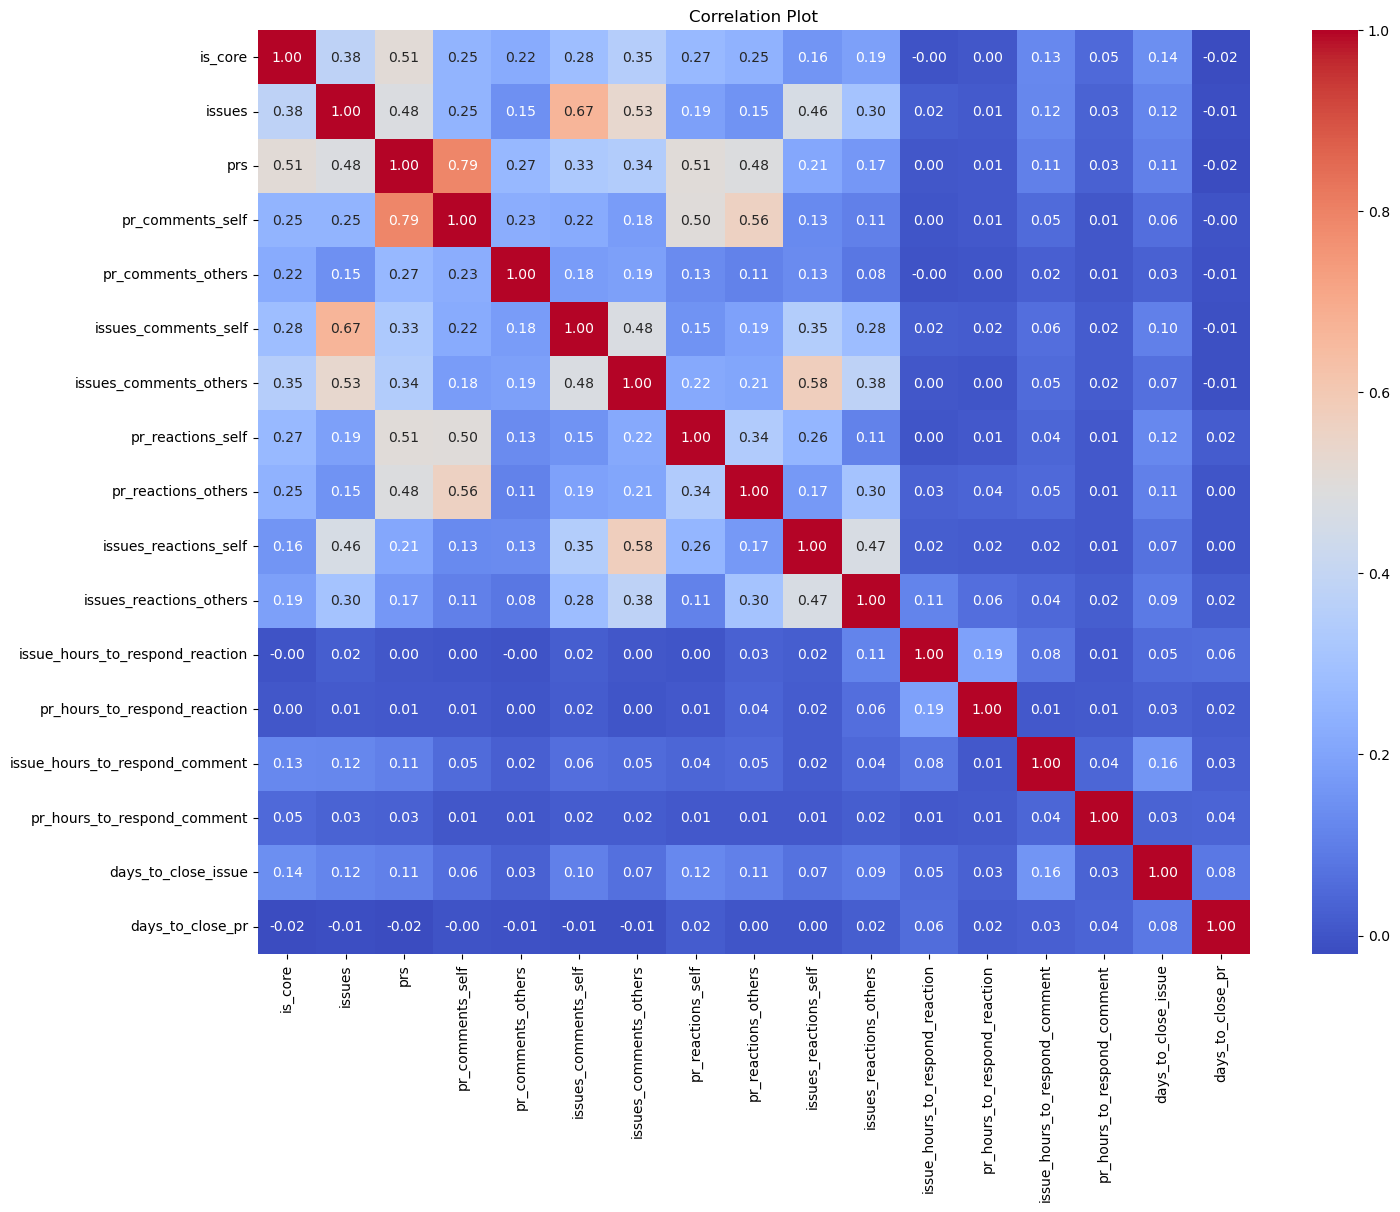

In [92]:
# Creating a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(subset_df_contributions.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [93]:
x1 = subset_df_contributions.drop(columns=['is_core'])
y = subset_df_contributions['is_core']

# Encode the categorical variable
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9786856127886323


C:\Users\Ethan Smith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
cp = df_resampled_adasyn.copy()

In [95]:
cp['test'] = cp.followers / (cp.months_experience + 2e-5) 
cp['test2'] = cp.followers / (cp.following  + 2e-5)

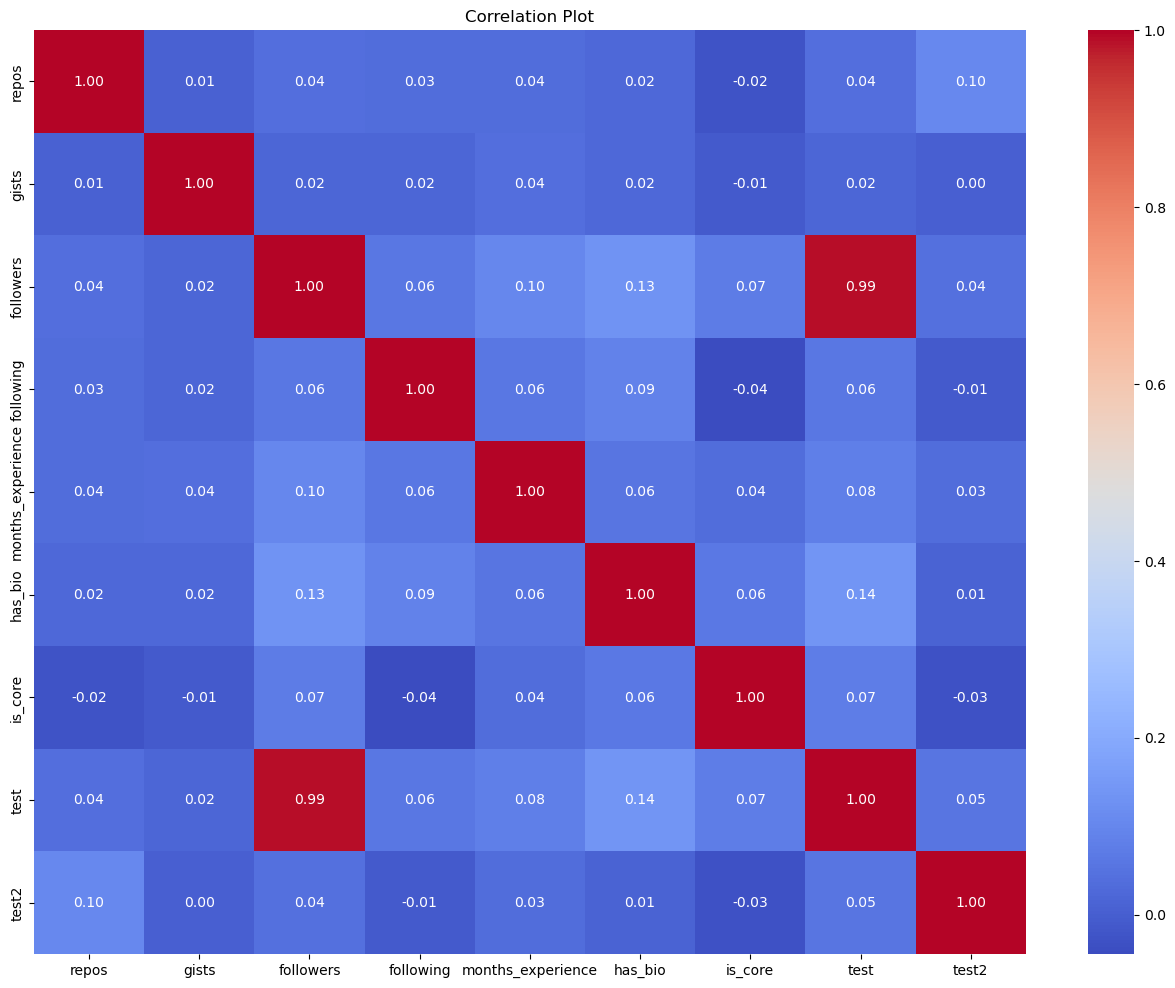

In [96]:
# Creating a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(cp.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

In [97]:
sns.pairplot(cp, hue = 'is_core')

Error in callback <function _draw_all_if_interactive at 0x0000017DA69BE440> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000017DA83435B0> (for post_execute):


KeyboardInterrupt: 

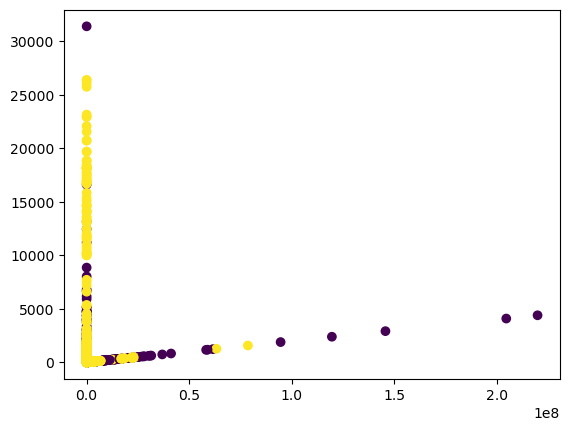

In [192]:
plt.scatter(x=cp.test2, y = cp.followers, c = cp.is_core)

In [99]:
x1 = cp.drop(columns=['is_core'])
y = cp['is_core']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis(solver='eigen', store_covariance=True, n_components = 1)
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform the test set
X_test_lda = lda.transform(X_test)

# Train a classifier on the transformed data
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_lda)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5523454488971731


In [100]:
x1 = cp.drop(columns=['is_core'])
y = cp['is_core']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Initialize and fit QDA model
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5141348244796521


In [101]:
print(cp.isna().sum())

repos                0
gists                0
followers            0
following            0
months_experience    0
has_bio              0
is_core              0
test                 0
test2                0
dtype: int64


In [102]:
scaler = StandardScaler()
x1_scale = scaler.fit_transform(x1)
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(x1_scale)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)

# Train a classifier on the transformed data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5209692451071761
